In [1]:
import os
import mne
import mne_bids
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from glob import glob
from mne_bids import BIDSPath, find_matching_paths, make_report, print_dir_tree, read_raw_bids

In [2]:
print('MNE–Python version', mne.__version__)
print('MNE–BIDS version', mne_bids.__version__)

MNE–Python version 1.8.0
MNE–BIDS version 0.16.0


### define inputs

In [3]:
'''# on Mac Studio Sharepoint
bids_root = os.path.join('/Users/dsj3886/',
                         'Library/CloudStorage/',
                         'OneDrive-NorthwesternUniversity',
                         'Documents - SoundBrain Lab',
                         'Lab Research Projects/',
                         'Experiments/NU_Experiments/',
                         'EAM1/', 'data-bids')
'''
# on MBA local (copied from Sharepoint)
bids_root = os.path.join('/Users/dsj3886/data_local/',
                        'EAM1_local/data-bids')

print_dir_tree(bids_root)

|data-bids/
|--- .DS_Store
|--- README
|--- dataset_description.json
|--- participants.json
|--- participants.tsv
|--- derivatives/
|------ sub-02_task-active_run-all_event-stimtrack_epochs.fif
|------ sub-02_task-passive_run-all_event-stimtrack_epochs.fif
|------ sub-03_task-active_run-all_event-stimtrack_epochs.fif
|------ sub-03_task-passive_run-all_event-stimtrack_epochs.fif
|------ sub-04_task-active_run-all_event-stimtrack_epochs.fif
|------ sub-04_task-passive_run-all_event-stimtrack_epochs.fif
|------ sub-05_task-active_run-all_event-stimtrack_epochs.fif
|------ sub-05_task-passive_run-all_event-stimtrack_epochs.fif
|------ sub-06_task-active_run-all_event-stimtrack_epochs.fif
|------ sub-06_task-passive_run-all_event-stimtrack_epochs.fif
|------ sub-07_task-active_run-all_event-stimtrack_epochs.fif
|------ sub-07_task-passive_run-all_event-stimtrack_epochs.fif
|------ sub-08_task-active_run-all_event-stimtrack_epochs.fif
|------ sub-08_task-passive_run-all_event-stimtrack_epoc

In [4]:
# outputs
deriv_dir = os.path.join(bids_root, 'derivatives')



# Combine multiple runs (BIDS)

In [5]:
task_list = ['active', 'passive']

In [6]:
# define function to generate event labels and codes
# (differs per participant)
# TODO: add motor condition
# TODO: fix sub < 13 task-active codes
def generate_event_dict(sub_label, task_label):
    if int(sub_label) > 19:
        event_dict = {'passive/pos': 1,
                    'passive/neg': 2,
                    'active/pos': 3,
                    'active/neg': 4}
    elif int(sub_label) > 13:
        event_dict = {f'{task_label}/pos': 1,
                    f'{task_label}/neg': 2,}
    elif int(sub_label) < 13:
        if task_label == 'passive':
            event_dict = {f'{task_label}/pos': 2049,
                        f'{task_label}/neg': 2050,}
        elif task_label == 'active':
            print('all active coded as 2049.',
                  '  need to fix')
            event_dict = {f'{task_label}/pos': 2049,
                        f'{task_label}/neg': 2050,}
            #pass
    return event_dict

In [6]:
# define event labels and codes (differs per participant)
'''
if int(sub_label) > 19:
    event_dict = {'passive/pos': 1,
                 'passive/neg': 2,
                 'active/pos': 3,
                 'active/neg': 4}
    event_mapping = {1:'passive/pos',
                     2:'passive/neg',
                     3:'active/pos',
                    4:'active/neg'}
elif int(sub_label) > 13:
    event_dict = {'pos': 1,
                  'neg': 2,}
    event_mapping = {1:'pos',
                     2:'neg'}
elif int(sub_label) < 13:
    print('all active coded as 2049.',
         '  need to fix')
    #event_dict = {'pos': 2049,
    #              'neg': 2050,}
'''

# if using stim track event files
event_dict = {'pos': 1,
                'neg': 2,}
event_mapping = {1:'pos',
                    2:'neg'}

In [ ]:
for sub_num in range(2, 3):
    sub_label = f'{sub_num:02d}'

    # initialize an empty dictionary for data
    task_evoked_dict = {}
    event_evoked_dict = {}

    for task_label in task_list:
        print(f'Loading {task_label} data')

        epoch_list = []

        for run_label in range(1,3):
            try:
                # load in EEG data
                bids_path = BIDSPath(root=bids_root, datatype='eeg', subject=str(sub_label), task=task_label, run=run_label)
                data = read_raw_bids(bids_path)
                data.load_data()

                events_fpath = sorted(glob(os.path.join(bids_root, 'events-stimtrack') + 
                                        f'/*{sub_label}*{task_label}*{run_label}_stimtrack_events.tsv'))[0]
                print(events_fpath)
                events_df = pd.read_csv(events_fpath, delimiter='\t') 

                annot = mne.Annotations(onset=events_df.onset, duration=0.170, description=events_df.type)
                data.set_annotations(annot)
                
            except IndexError:
                continue


Loading active data
Extracting EDF parameters from /Users/dsj3886/data_local/EAM1_local/data-bids/sub-02/eeg/sub-02_task-active_run-1_eeg.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading events from /Users/dsj3886/data_local/EAM1_local/data-bids/sub-02/eeg/sub-02_task-active_run-1_events.tsv.
Reading channel info from /Users/dsj3886/data_local/EAM1_local/data-bids/sub-02/eeg/sub-02_task-active_run-1_channels.tsv.
Not fully anonymizing info - keeping his_id, sex, and hand info
Reading 0 ... 16826367  =      0.000 ...  1027.000 secs...
/Users/dsj3886/data_local/EAM1_local/data-bids/events-stimtrack/sub-02_task-active_run-1_stimtrack_events.tsv
Extracting EDF parameters from /Users/dsj3886/data_local/EAM1_local/data-bids/sub-02/eeg/sub-02_task-active_run-2_eeg.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading events from /Users/dsj3886/data_local/EAM1_local/data-bids/sub-02/eeg/sub-02_task-act

In [37]:
data.annotations

<Annotations | 1200 segments: 1 (600), 2 (600)>

In [ ]:
sorted(glob(os.path.join(bids_root, 'events-stimtrack')+ 
                                       f'/*{sub_label}*{task_label}*{run_label}_stimtrack_events.tsv'))

In [ ]:
for sub_num in range(2, 35):
    sub_label = f'{sub_num:02d}'
    '''
    if int(sub_label) > 19:
        event_mapping = {1:'passive/pos',
                        2:'passive/neg',
                        3:'active/pos',
                        4:'active/neg'}
    elif int(sub_label) > 13:
        event_mapping = {1:'pos',
                         2:'neg'}
    else:
        event_mapping = {2049:'pos',
                         2050:'neg'}
    '''
    # initialize an empty dictionary for data
    task_evoked_dict = {}
    event_evoked_dict = {}

    for task_label in task_list:
        print(f'Loading {task_label} data')

        epoch_list = []

        for run_label in range(1,6):
        # load in EEG data
            bids_path = BIDSPath(root=bids_root, datatype='eeg', 
                                 subject=str(sub_label), 
                                 task=task_label, 
                                 run=run_label)
            
            try:
                data = read_raw_bids(bids_path)
                data.load_data()

                # re-reference data to linked mastoid reference
                data_ref = data.set_eeg_reference(ref_channels=['M1', 'M2'])
                
                # filter data
                data_filtered = data_ref.copy().filter(l_freq=65, h_freq=2000)

                # testing creating events from annotations
                # events_from_annot, event_dict2 = mne.events_from_annotations(data_filtered)
                '''

                # that didn't work - how about annotations from the events
                events = mne.find_events(data_filtered, 
                                        stim_channel='Status', 
                                        initial_event=True)
                
                annot_from_events = mne.annotations_from_events(
                                                                events=events,
                                                                event_desc=event_mapping,
                                                                sfreq=data_filtered.info['sfreq'])
                '''
                # how about loading events from the stim-track-generated events
                events_fpath = sorted(glob(os.path.join(bids_root, 'events-stimtrack') + 
                        f'/*{sub_label}*{task_label}*{run_label}_stimtrack_events.tsv'))[0]
                events_df = pd.read_csv(events_fpath, delimiter='\t') 
                annot = mne.Annotations(onset=events_df.onset, duration=0.170, description=events_df.type)
                data_filtered.set_annotations(annot)
                events_from_annot, event_dict2 = mne.events_from_annotations(data_filtered)
                
                # epoch data based on stimulus events
                epochs = mne.Epochs(data_filtered, 
                                    events=events_from_annot, #events, 
                                    event_id=event_dict2, #event_dict,
                                    on_missing='warn',
                                    picks=['Cz'],
                                    tmin=-0.04, tmax=0.4, 
                                    baseline=[-0.04, 0],
                                    reject=dict(eeg=75e-6)).drop_bad()
                
                epoch_list.append(epochs)

            except:
                print(f"No run {run_label} for task-{task_label}")
        
        try:
            # combine epochs across runs
            all_epochs = mne.concatenate_epochs(epoch_list)
        except IndexError:
            print(f'cannot run for sub-{sub_label} task-{task_label} run-{run_label}')

        try:
            out_base = f'sub-{sub_label}_task-{task_label}_run-all_event-stimtrack_epochs.fif'
            all_epochs.save(os.path.join(deriv_dir, out_base), overwrite=True)
        except:
            continue

        '''
        # create evoked average from across-run epochs
        event_evoked = all_epochs.average(by_event_type=True)
        all_evoked = all_epochs.average()

        # add to results dict
        event_evoked_dict[task_label] = event_evoked
        task_evoked_dict[task_label] = all_evoked
        '''

Loading active data
Extracting EDF parameters from /Users/dsj3886/data_local/EAM1_local/data-bids/sub-02/eeg/sub-02_task-active_run-1_eeg.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading events from /Users/dsj3886/data_local/EAM1_local/data-bids/sub-02/eeg/sub-02_task-active_run-1_events.tsv.
Reading channel info from /Users/dsj3886/data_local/EAM1_local/data-bids/sub-02/eeg/sub-02_task-active_run-1_channels.tsv.
Not fully anonymizing info - keeping his_id, sex, and hand info
Reading 0 ... 16826367  =      0.000 ...  1027.000 secs...
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 65 - 2e+03 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower p

/var/folders/5c/_fg_mvnx2dv1jhkw5xg5fv1h0000gq/T/ipykernel_37981/2392305334.py:81: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  all_epochs = mne.concatenate_epochs(epoch_list)


Overwriting existing file.
Overwriting existing file.
Loading passive data
Extracting EDF parameters from /Users/dsj3886/data_local/EAM1_local/data-bids/sub-02/eeg/sub-02_task-passive_run-1_eeg.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading events from /Users/dsj3886/data_local/EAM1_local/data-bids/sub-02/eeg/sub-02_task-passive_run-1_events.tsv.
Reading channel info from /Users/dsj3886/data_local/EAM1_local/data-bids/sub-02/eeg/sub-02_task-passive_run-1_channels.tsv.
Not fully anonymizing info - keeping his_id, sex, and hand info
Reading 0 ... 10551295  =      0.000 ...   644.000 secs...


/var/folders/5c/_fg_mvnx2dv1jhkw5xg5fv1h0000gq/T/ipykernel_37981/2392305334.py:87: RuntimeWarning: This filename (/Users/dsj3886/data_local/EAM1_local/data-bids/derivatives/sub-02_task-active_run-all_event-stimtrack_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  all_epochs.save(os.path.join(deriv_dir, out_base), overwrite=True)


EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 65 - 2e+03 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 65.00
- Lower transition bandwidth: 16.25 Hz (-6 dB cutoff frequency: 56.88 Hz)
- Upper passband edge: 2000.00 Hz
- Upper transition bandwidth: 500.00 Hz (-6 dB cutoff frequency: 2250.00 Hz)
- Filter length: 3329 samples (0.203 s)

Used Annotations descriptions: ['1', '2']
Not setting metadata
1200 matching events found
Setting baseline interval to [-0.04, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 1200 events and 7210 original time points ...
    Rejecting  epoch based on EEG : ['Cz']
    Rejecting  

/var/folders/5c/_fg_mvnx2dv1jhkw5xg5fv1h0000gq/T/ipykernel_37981/2392305334.py:81: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  all_epochs = mne.concatenate_epochs(epoch_list)


Overwriting existing file.
Overwriting existing file.
Loading active data
Extracting EDF parameters from /Users/dsj3886/data_local/EAM1_local/data-bids/sub-03/eeg/sub-03_task-active_run-1_eeg.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading events from /Users/dsj3886/data_local/EAM1_local/data-bids/sub-03/eeg/sub-03_task-active_run-1_events.tsv.
Reading channel info from /Users/dsj3886/data_local/EAM1_local/data-bids/sub-03/eeg/sub-03_task-active_run-1_channels.tsv.
Not fully anonymizing info - keeping his_id, sex, and hand info
Reading 0 ... 13221887  =      0.000 ...   807.000 secs...


/var/folders/5c/_fg_mvnx2dv1jhkw5xg5fv1h0000gq/T/ipykernel_37981/2392305334.py:87: RuntimeWarning: This filename (/Users/dsj3886/data_local/EAM1_local/data-bids/derivatives/sub-02_task-passive_run-all_event-stimtrack_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  all_epochs.save(os.path.join(deriv_dir, out_base), overwrite=True)


EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 65 - 2e+03 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 65.00
- Lower transition bandwidth: 16.25 Hz (-6 dB cutoff frequency: 56.88 Hz)
- Upper passband edge: 2000.00 Hz
- Upper transition bandwidth: 500.00 Hz (-6 dB cutoff frequency: 2250.00 Hz)
- Filter length: 3329 samples (0.203 s)

Used Annotations descriptions: ['1', '2']
Not setting metadata
1200 matching events found
Setting baseline interval to [-0.04, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 1200 events and 7210 original time points ...
    Rejecting  epoch based on EEG : ['Cz']
    Rejecting  

/var/folders/5c/_fg_mvnx2dv1jhkw5xg5fv1h0000gq/T/ipykernel_37981/2392305334.py:81: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  all_epochs = mne.concatenate_epochs(epoch_list)


Not setting metadata
3549 matching events found
Applying baseline correction (mode: mean)
Overwriting existing file.
Overwriting existing file.
Loading passive data
Extracting EDF parameters from /Users/dsj3886/data_local/EAM1_local/data-bids/sub-03/eeg/sub-03_task-passive_run-1_eeg.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading events from /Users/dsj3886/data_local/EAM1_local/data-bids/sub-03/eeg/sub-03_task-passive_run-1_events.tsv.
Reading channel info from /Users/dsj3886/data_local/EAM1_local/data-bids/sub-03/eeg/sub-03_task-passive_run-1_channels.tsv.
Not fully anonymizing info - keeping his_id, sex, and hand info
Reading 0 ... 10518527  =      0.000 ...   642.000 secs...


/var/folders/5c/_fg_mvnx2dv1jhkw5xg5fv1h0000gq/T/ipykernel_37981/2392305334.py:87: RuntimeWarning: This filename (/Users/dsj3886/data_local/EAM1_local/data-bids/derivatives/sub-03_task-active_run-all_event-stimtrack_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  all_epochs.save(os.path.join(deriv_dir, out_base), overwrite=True)


EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 65 - 2e+03 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 65.00
- Lower transition bandwidth: 16.25 Hz (-6 dB cutoff frequency: 56.88 Hz)
- Upper passband edge: 2000.00 Hz
- Upper transition bandwidth: 500.00 Hz (-6 dB cutoff frequency: 2250.00 Hz)
- Filter length: 3329 samples (0.203 s)

Used Annotations descriptions: ['1', '2']
Not setting metadata
1200 matching events found
Setting baseline interval to [-0.04, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 1200 events and 7210 original time points ...
    Rejecting  epoch based on EEG : ['Cz']
    Rejecting  

/var/folders/5c/_fg_mvnx2dv1jhkw5xg5fv1h0000gq/T/ipykernel_37981/2392305334.py:81: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  all_epochs = mne.concatenate_epochs(epoch_list)


Not setting metadata
3514 matching events found
Applying baseline correction (mode: mean)
Overwriting existing file.
Overwriting existing file.
Loading active data
Extracting EDF parameters from /Users/dsj3886/data_local/EAM1_local/data-bids/sub-04/eeg/sub-04_task-active_run-1_eeg.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading events from /Users/dsj3886/data_local/EAM1_local/data-bids/sub-04/eeg/sub-04_task-active_run-1_events.tsv.
Reading channel info from /Users/dsj3886/data_local/EAM1_local/data-bids/sub-04/eeg/sub-04_task-active_run-1_channels.tsv.
Not fully anonymizing info - keeping his_id, sex, and hand info


/var/folders/5c/_fg_mvnx2dv1jhkw5xg5fv1h0000gq/T/ipykernel_37981/2392305334.py:87: RuntimeWarning: This filename (/Users/dsj3886/data_local/EAM1_local/data-bids/derivatives/sub-03_task-passive_run-all_event-stimtrack_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  all_epochs.save(os.path.join(deriv_dir, out_base), overwrite=True)


Reading 0 ... 17219583  =      0.000 ...  1051.000 secs...
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 65 - 2e+03 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 65.00
- Lower transition bandwidth: 16.25 Hz (-6 dB cutoff frequency: 56.88 Hz)
- Upper passband edge: 2000.00 Hz
- Upper transition bandwidth: 500.00 Hz (-6 dB cutoff frequency: 2250.00 Hz)
- Filter length: 3329 samples (0.203 s)

Used Annotations descriptions: ['1', '2']
Not setting metadata
1200 matching events found
Setting baseline interval to [-0.04, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 1200 events and 7210 original time points ...

/var/folders/5c/_fg_mvnx2dv1jhkw5xg5fv1h0000gq/T/ipykernel_37981/2392305334.py:81: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  all_epochs = mne.concatenate_epochs(epoch_list)


Not setting metadata
3592 matching events found
Applying baseline correction (mode: mean)
Overwriting existing file.
Overwriting existing file.
Loading passive data
Extracting EDF parameters from /Users/dsj3886/data_local/EAM1_local/data-bids/sub-04/eeg/sub-04_task-passive_run-1_eeg.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading events from /Users/dsj3886/data_local/EAM1_local/data-bids/sub-04/eeg/sub-04_task-passive_run-1_events.tsv.
Reading channel info from /Users/dsj3886/data_local/EAM1_local/data-bids/sub-04/eeg/sub-04_task-passive_run-1_channels.tsv.
Not fully anonymizing info - keeping his_id, sex, and hand info
Reading 0 ... 10452991  =      0.000 ...   638.000 secs...


/var/folders/5c/_fg_mvnx2dv1jhkw5xg5fv1h0000gq/T/ipykernel_37981/2392305334.py:87: RuntimeWarning: This filename (/Users/dsj3886/data_local/EAM1_local/data-bids/derivatives/sub-04_task-active_run-all_event-stimtrack_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  all_epochs.save(os.path.join(deriv_dir, out_base), overwrite=True)


EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 65 - 2e+03 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 65.00
- Lower transition bandwidth: 16.25 Hz (-6 dB cutoff frequency: 56.88 Hz)
- Upper passband edge: 2000.00 Hz
- Upper transition bandwidth: 500.00 Hz (-6 dB cutoff frequency: 2250.00 Hz)
- Filter length: 3329 samples (0.203 s)

Used Annotations descriptions: ['1', '2']
Not setting metadata
1200 matching events found
Setting baseline interval to [-0.04, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 1200 events and 7210 original time points ...
    Rejecting  epoch based on EEG : ['Cz']
1 bad epochs dr

/var/folders/5c/_fg_mvnx2dv1jhkw5xg5fv1h0000gq/T/ipykernel_37981/2392305334.py:81: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  all_epochs = mne.concatenate_epochs(epoch_list)


Not setting metadata
3566 matching events found
Applying baseline correction (mode: mean)
Overwriting existing file.
Overwriting existing file.
Loading active data
Extracting EDF parameters from /Users/dsj3886/data_local/EAM1_local/data-bids/sub-05/eeg/sub-05_task-active_run-1_eeg.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading events from /Users/dsj3886/data_local/EAM1_local/data-bids/sub-05/eeg/sub-05_task-active_run-1_events.tsv.
Reading channel info from /Users/dsj3886/data_local/EAM1_local/data-bids/sub-05/eeg/sub-05_task-active_run-1_channels.tsv.
Not fully anonymizing info - keeping his_id, sex, and hand info
Reading 0 ... 9142271  =      0.000 ...   558.000 secs...


/var/folders/5c/_fg_mvnx2dv1jhkw5xg5fv1h0000gq/T/ipykernel_37981/2392305334.py:87: RuntimeWarning: This filename (/Users/dsj3886/data_local/EAM1_local/data-bids/derivatives/sub-04_task-passive_run-all_event-stimtrack_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  all_epochs.save(os.path.join(deriv_dir, out_base), overwrite=True)


EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 65 - 2e+03 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 65.00
- Lower transition bandwidth: 16.25 Hz (-6 dB cutoff frequency: 56.88 Hz)
- Upper passband edge: 2000.00 Hz
- Upper transition bandwidth: 500.00 Hz (-6 dB cutoff frequency: 2250.00 Hz)
- Filter length: 3329 samples (0.203 s)

Used Annotations descriptions: ['1', '2']
Not setting metadata
1200 matching events found
Setting baseline interval to [-0.04, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 1200 events and 7210 original time points ...
    Rejecting  epoch based on EEG : ['Cz']
    Rejecting  

/var/folders/5c/_fg_mvnx2dv1jhkw5xg5fv1h0000gq/T/ipykernel_37981/2392305334.py:81: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  all_epochs = mne.concatenate_epochs(epoch_list)


Using data from preloaded Raw for 1192 events and 7210 original time points ...
Not setting metadata
3566 matching events found
Applying baseline correction (mode: mean)
Overwriting existing file.
Overwriting existing file.
Loading passive data
Extracting EDF parameters from /Users/dsj3886/data_local/EAM1_local/data-bids/sub-05/eeg/sub-05_task-passive_run-1_eeg.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading events from /Users/dsj3886/data_local/EAM1_local/data-bids/sub-05/eeg/sub-05_task-passive_run-1_events.tsv.
Reading channel info from /Users/dsj3886/data_local/EAM1_local/data-bids/sub-05/eeg/sub-05_task-passive_run-1_channels.tsv.
Not fully anonymizing info - keeping his_id, sex, and hand info
Reading 0 ... 10551295  =      0.000 ...   644.000 secs...


/var/folders/5c/_fg_mvnx2dv1jhkw5xg5fv1h0000gq/T/ipykernel_37981/2392305334.py:87: RuntimeWarning: This filename (/Users/dsj3886/data_local/EAM1_local/data-bids/derivatives/sub-05_task-active_run-all_event-stimtrack_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  all_epochs.save(os.path.join(deriv_dir, out_base), overwrite=True)


EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 65 - 2e+03 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 65.00
- Lower transition bandwidth: 16.25 Hz (-6 dB cutoff frequency: 56.88 Hz)
- Upper passband edge: 2000.00 Hz
- Upper transition bandwidth: 500.00 Hz (-6 dB cutoff frequency: 2250.00 Hz)
- Filter length: 3329 samples (0.203 s)

Used Annotations descriptions: ['1', '2']
Not setting metadata
1200 matching events found
Setting baseline interval to [-0.04, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 1200 events and 7210 original time points ...
    Rejecting  epoch based on EEG : ['Cz']
    Rejecting  

/var/folders/5c/_fg_mvnx2dv1jhkw5xg5fv1h0000gq/T/ipykernel_37981/2392305334.py:81: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  all_epochs = mne.concatenate_epochs(epoch_list)


Not setting metadata
3581 matching events found
Applying baseline correction (mode: mean)
Overwriting existing file.
Overwriting existing file.
Loading active data
Extracting EDF parameters from /Users/dsj3886/data_local/EAM1_local/data-bids/sub-06/eeg/sub-06_task-active_run-1_eeg.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading events from /Users/dsj3886/data_local/EAM1_local/data-bids/sub-06/eeg/sub-06_task-active_run-1_events.tsv.
Reading channel info from /Users/dsj3886/data_local/EAM1_local/data-bids/sub-06/eeg/sub-06_task-active_run-1_channels.tsv.
Not fully anonymizing info - keeping his_id, sex, and hand info


/var/folders/5c/_fg_mvnx2dv1jhkw5xg5fv1h0000gq/T/ipykernel_37981/2392305334.py:87: RuntimeWarning: This filename (/Users/dsj3886/data_local/EAM1_local/data-bids/derivatives/sub-05_task-passive_run-all_event-stimtrack_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  all_epochs.save(os.path.join(deriv_dir, out_base), overwrite=True)


Reading 0 ... 15826943  =      0.000 ...   966.000 secs...
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 65 - 2e+03 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 65.00
- Lower transition bandwidth: 16.25 Hz (-6 dB cutoff frequency: 56.88 Hz)
- Upper passband edge: 2000.00 Hz
- Upper transition bandwidth: 500.00 Hz (-6 dB cutoff frequency: 2250.00 Hz)
- Filter length: 3329 samples (0.203 s)

Used Annotations descriptions: ['1', '2']
Not setting metadata
1200 matching events found
Setting baseline interval to [-0.04, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 1200 events and 7210 original time points ...

/var/folders/5c/_fg_mvnx2dv1jhkw5xg5fv1h0000gq/T/ipykernel_37981/2392305334.py:81: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  all_epochs = mne.concatenate_epochs(epoch_list)


Not setting metadata
3482 matching events found
Applying baseline correction (mode: mean)
Overwriting existing file.
Overwriting existing file.
Loading passive data
Extracting EDF parameters from /Users/dsj3886/data_local/EAM1_local/data-bids/sub-06/eeg/sub-06_task-passive_run-1_eeg.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading events from /Users/dsj3886/data_local/EAM1_local/data-bids/sub-06/eeg/sub-06_task-passive_run-1_events.tsv.
Reading channel info from /Users/dsj3886/data_local/EAM1_local/data-bids/sub-06/eeg/sub-06_task-passive_run-1_channels.tsv.
Not fully anonymizing info - keeping his_id, sex, and hand info
Reading 0 ... 10403839  =      0.000 ...   635.000 secs...


/var/folders/5c/_fg_mvnx2dv1jhkw5xg5fv1h0000gq/T/ipykernel_37981/2392305334.py:87: RuntimeWarning: This filename (/Users/dsj3886/data_local/EAM1_local/data-bids/derivatives/sub-06_task-active_run-all_event-stimtrack_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  all_epochs.save(os.path.join(deriv_dir, out_base), overwrite=True)


EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 65 - 2e+03 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 65.00
- Lower transition bandwidth: 16.25 Hz (-6 dB cutoff frequency: 56.88 Hz)
- Upper passband edge: 2000.00 Hz
- Upper transition bandwidth: 500.00 Hz (-6 dB cutoff frequency: 2250.00 Hz)
- Filter length: 3329 samples (0.203 s)

Used Annotations descriptions: ['1', '2']
Not setting metadata
1200 matching events found
Setting baseline interval to [-0.04, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 1200 events and 7210 original time points ...
    Rejecting  epoch based on EEG : ['Cz']
    Rejecting  

/var/folders/5c/_fg_mvnx2dv1jhkw5xg5fv1h0000gq/T/ipykernel_37981/2392305334.py:81: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  all_epochs = mne.concatenate_epochs(epoch_list)


Overwriting existing file.
Overwriting existing file.
Loading active data
Extracting EDF parameters from /Users/dsj3886/data_local/EAM1_local/data-bids/sub-07/eeg/sub-07_task-active_run-1_eeg.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading events from /Users/dsj3886/data_local/EAM1_local/data-bids/sub-07/eeg/sub-07_task-active_run-1_events.tsv.
Reading channel info from /Users/dsj3886/data_local/EAM1_local/data-bids/sub-07/eeg/sub-07_task-active_run-1_channels.tsv.
Not fully anonymizing info - keeping his_id, sex, and hand info
Reading 0 ... 16809983  =      0.000 ...  1026.000 secs...


/var/folders/5c/_fg_mvnx2dv1jhkw5xg5fv1h0000gq/T/ipykernel_37981/2392305334.py:87: RuntimeWarning: This filename (/Users/dsj3886/data_local/EAM1_local/data-bids/derivatives/sub-06_task-passive_run-all_event-stimtrack_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  all_epochs.save(os.path.join(deriv_dir, out_base), overwrite=True)


EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 65 - 2e+03 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 65.00
- Lower transition bandwidth: 16.25 Hz (-6 dB cutoff frequency: 56.88 Hz)
- Upper passband edge: 2000.00 Hz
- Upper transition bandwidth: 500.00 Hz (-6 dB cutoff frequency: 2250.00 Hz)
- Filter length: 3329 samples (0.203 s)

Used Annotations descriptions: ['1', '2']
Not setting metadata
1200 matching events found
Setting baseline interval to [-0.04, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 1200 events and 7210 original time points ...
    Rejecting  epoch based on EEG : ['Cz']
    Rejecting  

/var/folders/5c/_fg_mvnx2dv1jhkw5xg5fv1h0000gq/T/ipykernel_37981/2392305334.py:81: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  all_epochs = mne.concatenate_epochs(epoch_list)


Overwriting existing file.
Overwriting existing file.
Loading passive data
Extracting EDF parameters from /Users/dsj3886/data_local/EAM1_local/data-bids/sub-07/eeg/sub-07_task-passive_run-1_eeg.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading events from /Users/dsj3886/data_local/EAM1_local/data-bids/sub-07/eeg/sub-07_task-passive_run-1_events.tsv.
Reading channel info from /Users/dsj3886/data_local/EAM1_local/data-bids/sub-07/eeg/sub-07_task-passive_run-1_channels.tsv.
Not fully anonymizing info - keeping his_id, sex, and hand info
Reading 0 ... 10420223  =      0.000 ...   636.000 secs...


/var/folders/5c/_fg_mvnx2dv1jhkw5xg5fv1h0000gq/T/ipykernel_37981/2392305334.py:87: RuntimeWarning: This filename (/Users/dsj3886/data_local/EAM1_local/data-bids/derivatives/sub-07_task-active_run-all_event-stimtrack_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  all_epochs.save(os.path.join(deriv_dir, out_base), overwrite=True)


EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 65 - 2e+03 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 65.00
- Lower transition bandwidth: 16.25 Hz (-6 dB cutoff frequency: 56.88 Hz)
- Upper passband edge: 2000.00 Hz
- Upper transition bandwidth: 500.00 Hz (-6 dB cutoff frequency: 2250.00 Hz)
- Filter length: 3329 samples (0.203 s)

Used Annotations descriptions: ['1', '2']
Not setting metadata
1200 matching events found
Setting baseline interval to [-0.04, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 1200 events and 7210 original time points ...
    Rejecting  epoch based on EEG : ['Cz']
    Rejecting  

/var/folders/5c/_fg_mvnx2dv1jhkw5xg5fv1h0000gq/T/ipykernel_37981/2392305334.py:81: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  all_epochs = mne.concatenate_epochs(epoch_list)


Overwriting existing file.
Overwriting existing file.
Loading active data
No run 1 for task-active
No run 2 for task-active
No run 3 for task-active
No run 4 for task-active
No run 5 for task-active
cannot run for sub-08 task-active run-5
Overwriting existing file.
Overwriting existing file.
Loading passive data
No run 1 for task-passive
No run 2 for task-passive
No run 3 for task-passive
No run 4 for task-passive
No run 5 for task-passive
cannot run for sub-08 task-passive run-5
Overwriting existing file.
Overwriting existing file.


/var/folders/5c/_fg_mvnx2dv1jhkw5xg5fv1h0000gq/T/ipykernel_37981/2392305334.py:87: RuntimeWarning: This filename (/Users/dsj3886/data_local/EAM1_local/data-bids/derivatives/sub-07_task-passive_run-all_event-stimtrack_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  all_epochs.save(os.path.join(deriv_dir, out_base), overwrite=True)
/var/folders/5c/_fg_mvnx2dv1jhkw5xg5fv1h0000gq/T/ipykernel_37981/2392305334.py:87: RuntimeWarning: This filename (/Users/dsj3886/data_local/EAM1_local/data-bids/derivatives/sub-08_task-active_run-all_event-stimtrack_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  all_epochs.save(os.path.join(deriv_dir, out_base), overwrite=True)
/var/folders/5c/_fg_mvnx2dv1jhkw5xg5fv1h0000gq/T/ipykernel_37981/2392305334.py:87: RuntimeWarning: This filename (/Users/dsj3886/data_local/EAM1_local/data-b

Loading active data
Extracting EDF parameters from /Users/dsj3886/data_local/EAM1_local/data-bids/sub-09/eeg/sub-09_task-active_run-1_eeg.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading events from /Users/dsj3886/data_local/EAM1_local/data-bids/sub-09/eeg/sub-09_task-active_run-1_events.tsv.
Reading channel info from /Users/dsj3886/data_local/EAM1_local/data-bids/sub-09/eeg/sub-09_task-active_run-1_channels.tsv.
Not fully anonymizing info - keeping his_id, sex, and hand info
Reading 0 ... 12402687  =      0.000 ...   757.000 secs...
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 65 - 2e+03 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower p

/var/folders/5c/_fg_mvnx2dv1jhkw5xg5fv1h0000gq/T/ipykernel_37981/2392305334.py:81: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  all_epochs = mne.concatenate_epochs(epoch_list)


Not setting metadata
3544 matching events found
Applying baseline correction (mode: mean)
Overwriting existing file.
Overwriting existing file.
Loading passive data
Extracting EDF parameters from /Users/dsj3886/data_local/EAM1_local/data-bids/sub-09/eeg/sub-09_task-passive_run-1_eeg.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading events from /Users/dsj3886/data_local/EAM1_local/data-bids/sub-09/eeg/sub-09_task-passive_run-1_events.tsv.
Reading channel info from /Users/dsj3886/data_local/EAM1_local/data-bids/sub-09/eeg/sub-09_task-passive_run-1_channels.tsv.
Not fully anonymizing info - keeping his_id, sex, and hand info
Reading 0 ... 10354687  =      0.000 ...   632.000 secs...


/var/folders/5c/_fg_mvnx2dv1jhkw5xg5fv1h0000gq/T/ipykernel_37981/2392305334.py:87: RuntimeWarning: This filename (/Users/dsj3886/data_local/EAM1_local/data-bids/derivatives/sub-09_task-active_run-all_event-stimtrack_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  all_epochs.save(os.path.join(deriv_dir, out_base), overwrite=True)


EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 65 - 2e+03 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 65.00
- Lower transition bandwidth: 16.25 Hz (-6 dB cutoff frequency: 56.88 Hz)
- Upper passband edge: 2000.00 Hz
- Upper transition bandwidth: 500.00 Hz (-6 dB cutoff frequency: 2250.00 Hz)
- Filter length: 3329 samples (0.203 s)

Used Annotations descriptions: ['1', '2']
Not setting metadata
1200 matching events found
Setting baseline interval to [-0.04, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 1200 events and 7210 original time points ...
    Rejecting  epoch based on EEG : ['Cz']
    Rejecting  

/var/folders/5c/_fg_mvnx2dv1jhkw5xg5fv1h0000gq/T/ipykernel_37981/2392305334.py:81: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  all_epochs = mne.concatenate_epochs(epoch_list)


Not setting metadata
3530 matching events found
Applying baseline correction (mode: mean)
Overwriting existing file.
Overwriting existing file.
Loading active data
No run 1 for task-active
No run 2 for task-active
No run 3 for task-active
No run 4 for task-active
No run 5 for task-active
cannot run for sub-10 task-active run-5
Overwriting existing file.
Overwriting existing file.


/var/folders/5c/_fg_mvnx2dv1jhkw5xg5fv1h0000gq/T/ipykernel_37981/2392305334.py:87: RuntimeWarning: This filename (/Users/dsj3886/data_local/EAM1_local/data-bids/derivatives/sub-09_task-passive_run-all_event-stimtrack_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  all_epochs.save(os.path.join(deriv_dir, out_base), overwrite=True)
/var/folders/5c/_fg_mvnx2dv1jhkw5xg5fv1h0000gq/T/ipykernel_37981/2392305334.py:87: RuntimeWarning: This filename (/Users/dsj3886/data_local/EAM1_local/data-bids/derivatives/sub-10_task-active_run-all_event-stimtrack_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  all_epochs.save(os.path.join(deriv_dir, out_base), overwrite=True)


Loading passive data
Extracting EDF parameters from /Users/dsj3886/data_local/EAM1_local/data-bids/sub-10/eeg/sub-10_task-passive_run-1_eeg.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading events from /Users/dsj3886/data_local/EAM1_local/data-bids/sub-10/eeg/sub-10_task-passive_run-1_events.tsv.
Reading channel info from /Users/dsj3886/data_local/EAM1_local/data-bids/sub-10/eeg/sub-10_task-passive_run-1_channels.tsv.
Not fully anonymizing info - keeping his_id, sex, and hand info
Reading 0 ... 10371071  =      0.000 ...   633.000 secs...
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 65 - 2e+03 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Low

/var/folders/5c/_fg_mvnx2dv1jhkw5xg5fv1h0000gq/T/ipykernel_37981/2392305334.py:81: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  all_epochs = mne.concatenate_epochs(epoch_list)


Using data from preloaded Raw for 1082 events and 7210 original time points ...
Not setting metadata
3390 matching events found
Applying baseline correction (mode: mean)
Overwriting existing file.
Overwriting existing file.
Loading active data
Extracting EDF parameters from /Users/dsj3886/data_local/EAM1_local/data-bids/sub-11/eeg/sub-11_task-active_run-1_eeg.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading events from /Users/dsj3886/data_local/EAM1_local/data-bids/sub-11/eeg/sub-11_task-active_run-1_events.tsv.
Reading channel info from /Users/dsj3886/data_local/EAM1_local/data-bids/sub-11/eeg/sub-11_task-active_run-1_channels.tsv.


/var/folders/5c/_fg_mvnx2dv1jhkw5xg5fv1h0000gq/T/ipykernel_37981/2392305334.py:87: RuntimeWarning: This filename (/Users/dsj3886/data_local/EAM1_local/data-bids/derivatives/sub-10_task-passive_run-all_event-stimtrack_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  all_epochs.save(os.path.join(deriv_dir, out_base), overwrite=True)


Not fully anonymizing info - keeping his_id, sex, and hand info
Reading 0 ... 10715135  =      0.000 ...   654.000 secs...
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 65 - 2e+03 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 65.00
- Lower transition bandwidth: 16.25 Hz (-6 dB cutoff frequency: 56.88 Hz)
- Upper passband edge: 2000.00 Hz
- Upper transition bandwidth: 500.00 Hz (-6 dB cutoff frequency: 2250.00 Hz)
- Filter length: 3329 samples (0.203 s)

Used Annotations descriptions: ['1', '2']
Not setting metadata
1200 matching events found
Setting baseline interval to [-0.04, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from

/var/folders/5c/_fg_mvnx2dv1jhkw5xg5fv1h0000gq/T/ipykernel_37981/2392305334.py:81: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  all_epochs = mne.concatenate_epochs(epoch_list)


Not setting metadata
3575 matching events found
Applying baseline correction (mode: mean)
Overwriting existing file.
Overwriting existing file.
Loading passive data
Extracting EDF parameters from /Users/dsj3886/data_local/EAM1_local/data-bids/sub-11/eeg/sub-11_task-passive_run-1_eeg.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading events from /Users/dsj3886/data_local/EAM1_local/data-bids/sub-11/eeg/sub-11_task-passive_run-1_events.tsv.
Reading channel info from /Users/dsj3886/data_local/EAM1_local/data-bids/sub-11/eeg/sub-11_task-passive_run-1_channels.tsv.
Not fully anonymizing info - keeping his_id, sex, and hand info
Reading 0 ... 10289151  =      0.000 ...   628.000 secs...


/var/folders/5c/_fg_mvnx2dv1jhkw5xg5fv1h0000gq/T/ipykernel_37981/2392305334.py:87: RuntimeWarning: This filename (/Users/dsj3886/data_local/EAM1_local/data-bids/derivatives/sub-11_task-active_run-all_event-stimtrack_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  all_epochs.save(os.path.join(deriv_dir, out_base), overwrite=True)


EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 65 - 2e+03 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 65.00
- Lower transition bandwidth: 16.25 Hz (-6 dB cutoff frequency: 56.88 Hz)
- Upper passband edge: 2000.00 Hz
- Upper transition bandwidth: 500.00 Hz (-6 dB cutoff frequency: 2250.00 Hz)
- Filter length: 3329 samples (0.203 s)

Used Annotations descriptions: ['1', '2']
Not setting metadata
1200 matching events found
Setting baseline interval to [-0.04, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 1200 events and 7210 original time points ...
    Rejecting  epoch based on EEG : ['Cz']
    Rejecting  

/var/folders/5c/_fg_mvnx2dv1jhkw5xg5fv1h0000gq/T/ipykernel_37981/2392305334.py:81: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  all_epochs = mne.concatenate_epochs(epoch_list)


Not setting metadata
3492 matching events found
Applying baseline correction (mode: mean)
Overwriting existing file.
Overwriting existing file.
Loading active data
No run 1 for task-active
No run 2 for task-active
No run 3 for task-active
No run 4 for task-active
No run 5 for task-active
cannot run for sub-12 task-active run-5
Overwriting existing file.


/var/folders/5c/_fg_mvnx2dv1jhkw5xg5fv1h0000gq/T/ipykernel_37981/2392305334.py:87: RuntimeWarning: This filename (/Users/dsj3886/data_local/EAM1_local/data-bids/derivatives/sub-11_task-passive_run-all_event-stimtrack_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  all_epochs.save(os.path.join(deriv_dir, out_base), overwrite=True)
/var/folders/5c/_fg_mvnx2dv1jhkw5xg5fv1h0000gq/T/ipykernel_37981/2392305334.py:87: RuntimeWarning: This filename (/Users/dsj3886/data_local/EAM1_local/data-bids/derivatives/sub-12_task-active_run-all_event-stimtrack_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  all_epochs.save(os.path.join(deriv_dir, out_base), overwrite=True)


Overwriting existing file.
Loading passive data
No run 1 for task-passive
No run 2 for task-passive
No run 3 for task-passive
No run 4 for task-passive
No run 5 for task-passive
cannot run for sub-12 task-passive run-5
Overwriting existing file.
Overwriting existing file.
Loading active data
No run 1 for task-active
No run 2 for task-active
No run 3 for task-active
No run 4 for task-active
No run 5 for task-active
cannot run for sub-13 task-active run-5
Overwriting existing file.
Overwriting existing file.


/var/folders/5c/_fg_mvnx2dv1jhkw5xg5fv1h0000gq/T/ipykernel_37981/2392305334.py:87: RuntimeWarning: This filename (/Users/dsj3886/data_local/EAM1_local/data-bids/derivatives/sub-12_task-passive_run-all_event-stimtrack_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  all_epochs.save(os.path.join(deriv_dir, out_base), overwrite=True)
/var/folders/5c/_fg_mvnx2dv1jhkw5xg5fv1h0000gq/T/ipykernel_37981/2392305334.py:87: RuntimeWarning: This filename (/Users/dsj3886/data_local/EAM1_local/data-bids/derivatives/sub-13_task-active_run-all_event-stimtrack_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  all_epochs.save(os.path.join(deriv_dir, out_base), overwrite=True)


Loading passive data
No run 1 for task-passive
No run 2 for task-passive
No run 3 for task-passive
No run 4 for task-passive
No run 5 for task-passive
cannot run for sub-13 task-passive run-5
Overwriting existing file.
Overwriting existing file.
Loading active data
Extracting EDF parameters from /Users/dsj3886/data_local/EAM1_local/data-bids/sub-14/eeg/sub-14_task-active_run-1_eeg.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading events from /Users/dsj3886/data_local/EAM1_local/data-bids/sub-14/eeg/sub-14_task-active_run-1_events.tsv.
Reading channel info from /Users/dsj3886/data_local/EAM1_local/data-bids/sub-14/eeg/sub-14_task-active_run-1_channels.tsv.
Not fully anonymizing info - keeping his_id, sex, and hand info
Reading 0 ... 14467071  =      0.000 ...   883.000 secs...


/var/folders/5c/_fg_mvnx2dv1jhkw5xg5fv1h0000gq/T/ipykernel_37981/2392305334.py:87: RuntimeWarning: This filename (/Users/dsj3886/data_local/EAM1_local/data-bids/derivatives/sub-13_task-passive_run-all_event-stimtrack_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  all_epochs.save(os.path.join(deriv_dir, out_base), overwrite=True)


EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 65 - 2e+03 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 65.00
- Lower transition bandwidth: 16.25 Hz (-6 dB cutoff frequency: 56.88 Hz)
- Upper passband edge: 2000.00 Hz
- Upper transition bandwidth: 500.00 Hz (-6 dB cutoff frequency: 2250.00 Hz)
- Filter length: 3329 samples (0.203 s)

Used Annotations descriptions: ['1', '2']
Not setting metadata
1200 matching events found
Setting baseline interval to [-0.04, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 1200 events and 7210 original time points ...
    Rejecting  epoch based on EEG : ['Cz']
    Rejecting  

/var/folders/5c/_fg_mvnx2dv1jhkw5xg5fv1h0000gq/T/ipykernel_37981/2392305334.py:81: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  all_epochs = mne.concatenate_epochs(epoch_list)


Using data from preloaded Raw for 1131 events and 7210 original time points ...
Not setting metadata
4613 matching events found
Applying baseline correction (mode: mean)
Overwriting existing file.
Overwriting existing file.
Loading passive data
Extracting EDF parameters from /Users/dsj3886/data_local/EAM1_local/data-bids/sub-14/eeg/sub-14_task-passive_run-1_eeg.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading events from /Users/dsj3886/data_local/EAM1_local/data-bids/sub-14/eeg/sub-14_task-passive_run-1_events.tsv.
Reading channel info from /Users/dsj3886/data_local/EAM1_local/data-bids/sub-14/eeg/sub-14_task-passive_run-1_channels.tsv.
Not fully anonymizing info - keeping his_id, sex, and hand info
Reading 0 ... 9928703  =      0.000 ...   606.000 secs...


/var/folders/5c/_fg_mvnx2dv1jhkw5xg5fv1h0000gq/T/ipykernel_37981/2392305334.py:87: RuntimeWarning: This filename (/Users/dsj3886/data_local/EAM1_local/data-bids/derivatives/sub-14_task-active_run-all_event-stimtrack_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  all_epochs.save(os.path.join(deriv_dir, out_base), overwrite=True)


EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 65 - 2e+03 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 65.00
- Lower transition bandwidth: 16.25 Hz (-6 dB cutoff frequency: 56.88 Hz)
- Upper passband edge: 2000.00 Hz
- Upper transition bandwidth: 500.00 Hz (-6 dB cutoff frequency: 2250.00 Hz)
- Filter length: 3329 samples (0.203 s)

Used Annotations descriptions: ['1', '2']
Not setting metadata
1200 matching events found
Setting baseline interval to [-0.04, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 1200 events and 7210 original time points ...
    Rejecting  epoch based on EEG : ['Cz']
    Rejecting  

/var/folders/5c/_fg_mvnx2dv1jhkw5xg5fv1h0000gq/T/ipykernel_37981/2392305334.py:81: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  all_epochs = mne.concatenate_epochs(epoch_list)
/var/folders/5c/_fg_mvnx2dv1jhkw5xg5fv1h0000gq/T/ipykernel_37981/2392305334.py:87: RuntimeWarning: This filename (/Users/dsj3886/data_local/EAM1_local/data-bids/derivatives/sub-14_task-passive_run-all_event-stimtrack_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  all_epochs.save(os.path.join(deriv_dir, out_base), overwrite=True)


Reading 0 ... 10567679  =      0.000 ...   645.000 secs...
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 65 - 2e+03 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 65.00
- Lower transition bandwidth: 16.25 Hz (-6 dB cutoff frequency: 56.88 Hz)
- Upper passband edge: 2000.00 Hz
- Upper transition bandwidth: 500.00 Hz (-6 dB cutoff frequency: 2250.00 Hz)
- Filter length: 3329 samples (0.203 s)

Used Annotations descriptions: ['1', '2']
Not setting metadata
1200 matching events found
Setting baseline interval to [-0.04, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 1200 events and 7210 original time points ...

/var/folders/5c/_fg_mvnx2dv1jhkw5xg5fv1h0000gq/T/ipykernel_37981/2392305334.py:81: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  all_epochs = mne.concatenate_epochs(epoch_list)


Not setting metadata
3373 matching events found
Applying baseline correction (mode: mean)
Overwriting existing file.
Overwriting existing file.
Loading passive data
Extracting EDF parameters from /Users/dsj3886/data_local/EAM1_local/data-bids/sub-15/eeg/sub-15_task-passive_run-1_eeg.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading events from /Users/dsj3886/data_local/EAM1_local/data-bids/sub-15/eeg/sub-15_task-passive_run-1_events.tsv.
Reading channel info from /Users/dsj3886/data_local/EAM1_local/data-bids/sub-15/eeg/sub-15_task-passive_run-1_channels.tsv.
Not fully anonymizing info - keeping his_id, sex, and hand info
Reading 0 ... 9945087  =      0.000 ...   607.000 secs...


/var/folders/5c/_fg_mvnx2dv1jhkw5xg5fv1h0000gq/T/ipykernel_37981/2392305334.py:87: RuntimeWarning: This filename (/Users/dsj3886/data_local/EAM1_local/data-bids/derivatives/sub-15_task-active_run-all_event-stimtrack_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  all_epochs.save(os.path.join(deriv_dir, out_base), overwrite=True)


EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 65 - 2e+03 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 65.00
- Lower transition bandwidth: 16.25 Hz (-6 dB cutoff frequency: 56.88 Hz)
- Upper passband edge: 2000.00 Hz
- Upper transition bandwidth: 500.00 Hz (-6 dB cutoff frequency: 2250.00 Hz)
- Filter length: 3329 samples (0.203 s)

Used Annotations descriptions: ['1', '2']
Not setting metadata
1200 matching events found
Setting baseline interval to [-0.04, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 1200 events and 7210 original time points ...
    Rejecting  epoch based on EEG : ['Cz']
    Rejecting  

/var/folders/5c/_fg_mvnx2dv1jhkw5xg5fv1h0000gq/T/ipykernel_37981/2392305334.py:81: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  all_epochs = mne.concatenate_epochs(epoch_list)


Using data from preloaded Raw for 1105 events and 7210 original time points ...
Not setting metadata
4441 matching events found
Applying baseline correction (mode: mean)
Overwriting existing file.
Overwriting existing file.
Loading active data
Extracting EDF parameters from /Users/dsj3886/data_local/EAM1_local/data-bids/sub-16/eeg/sub-16_task-active_run-1_eeg.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading events from /Users/dsj3886/data_local/EAM1_local/data-bids/sub-16/eeg/sub-16_task-active_run-1_events.tsv.
Reading channel info from /Users/dsj3886/data_local/EAM1_local/data-bids/sub-16/eeg/sub-16_task-active_run-1_channels.tsv.
Not fully anonymizing info - keeping his_id, sex, and hand info
Reading 0 ... 10797055  =      0.000 ...   659.000 secs...


/var/folders/5c/_fg_mvnx2dv1jhkw5xg5fv1h0000gq/T/ipykernel_37981/2392305334.py:87: RuntimeWarning: This filename (/Users/dsj3886/data_local/EAM1_local/data-bids/derivatives/sub-15_task-passive_run-all_event-stimtrack_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  all_epochs.save(os.path.join(deriv_dir, out_base), overwrite=True)


EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 65 - 2e+03 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 65.00
- Lower transition bandwidth: 16.25 Hz (-6 dB cutoff frequency: 56.88 Hz)
- Upper passband edge: 2000.00 Hz
- Upper transition bandwidth: 500.00 Hz (-6 dB cutoff frequency: 2250.00 Hz)
- Filter length: 3329 samples (0.203 s)

Used Annotations descriptions: ['1', '2']
Not setting metadata
1200 matching events found
Setting baseline interval to [-0.04, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 1200 events and 7210 original time points ...
    Rejecting  epoch based on EEG : ['Cz']
    Rejecting  

/var/folders/5c/_fg_mvnx2dv1jhkw5xg5fv1h0000gq/T/ipykernel_37981/2392305334.py:81: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  all_epochs = mne.concatenate_epochs(epoch_list)


Using data from preloaded Raw for 1185 events and 7210 original time points ...
Using data from preloaded Raw for 1186 events and 7210 original time points ...
Not setting metadata
5901 matching events found
Applying baseline correction (mode: mean)
Overwriting existing file.
Overwriting existing file.


/var/folders/5c/_fg_mvnx2dv1jhkw5xg5fv1h0000gq/T/ipykernel_37981/2392305334.py:87: RuntimeWarning: This filename (/Users/dsj3886/data_local/EAM1_local/data-bids/derivatives/sub-16_task-active_run-all_event-stimtrack_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  all_epochs.save(os.path.join(deriv_dir, out_base), overwrite=True)


Loading passive data
Extracting EDF parameters from /Users/dsj3886/data_local/EAM1_local/data-bids/sub-16/eeg/sub-16_task-passive_run-1_eeg.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading events from /Users/dsj3886/data_local/EAM1_local/data-bids/sub-16/eeg/sub-16_task-passive_run-1_events.tsv.
Reading channel info from /Users/dsj3886/data_local/EAM1_local/data-bids/sub-16/eeg/sub-16_task-passive_run-1_channels.tsv.
Not fully anonymizing info - keeping his_id, sex, and hand info
Reading 0 ... 10223615  =      0.000 ...   624.000 secs...
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 65 - 2e+03 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Low

/var/folders/5c/_fg_mvnx2dv1jhkw5xg5fv1h0000gq/T/ipykernel_37981/2392305334.py:81: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  all_epochs = mne.concatenate_epochs(epoch_list)


Using data from preloaded Raw for 1180 events and 7210 original time points ...
Not setting metadata
4688 matching events found
Applying baseline correction (mode: mean)
Overwriting existing file.
Overwriting existing file.
Loading active data
Extracting EDF parameters from /Users/dsj3886/data_local/EAM1_local/data-bids/sub-17/eeg/sub-17_task-active_run-1_eeg.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading events from /Users/dsj3886/data_local/EAM1_local/data-bids/sub-17/eeg/sub-17_task-active_run-1_events.tsv.
Reading channel info from /Users/dsj3886/data_local/EAM1_local/data-bids/sub-17/eeg/sub-17_task-active_run-1_channels.tsv.
Not fully anonymizing info - keeping his_id, sex, and hand info


/var/folders/5c/_fg_mvnx2dv1jhkw5xg5fv1h0000gq/T/ipykernel_37981/2392305334.py:87: RuntimeWarning: This filename (/Users/dsj3886/data_local/EAM1_local/data-bids/derivatives/sub-16_task-passive_run-all_event-stimtrack_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  all_epochs.save(os.path.join(deriv_dir, out_base), overwrite=True)


Reading 0 ... 19857407  =      0.000 ...  1212.000 secs...
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 65 - 2e+03 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 65.00
- Lower transition bandwidth: 16.25 Hz (-6 dB cutoff frequency: 56.88 Hz)
- Upper passband edge: 2000.00 Hz
- Upper transition bandwidth: 500.00 Hz (-6 dB cutoff frequency: 2250.00 Hz)
- Filter length: 3329 samples (0.203 s)

Used Annotations descriptions: ['1', '2']
Not setting metadata
1200 matching events found
Setting baseline interval to [-0.04, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 1200 events and 7210 original time points ...

/var/folders/5c/_fg_mvnx2dv1jhkw5xg5fv1h0000gq/T/ipykernel_37981/2392305334.py:81: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  all_epochs = mne.concatenate_epochs(epoch_list)


Overwriting existing file.
Overwriting existing file.
Loading passive data
Extracting EDF parameters from /Users/dsj3886/data_local/EAM1_local/data-bids/sub-17/eeg/sub-17_task-passive_run-1_eeg.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading events from /Users/dsj3886/data_local/EAM1_local/data-bids/sub-17/eeg/sub-17_task-passive_run-1_events.tsv.
Reading channel info from /Users/dsj3886/data_local/EAM1_local/data-bids/sub-17/eeg/sub-17_task-passive_run-1_channels.tsv.
Not fully anonymizing info - keeping his_id, sex, and hand info
Reading 0 ... 9977855  =      0.000 ...   609.000 secs...


/var/folders/5c/_fg_mvnx2dv1jhkw5xg5fv1h0000gq/T/ipykernel_37981/2392305334.py:87: RuntimeWarning: This filename (/Users/dsj3886/data_local/EAM1_local/data-bids/derivatives/sub-17_task-active_run-all_event-stimtrack_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  all_epochs.save(os.path.join(deriv_dir, out_base), overwrite=True)


EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 65 - 2e+03 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 65.00
- Lower transition bandwidth: 16.25 Hz (-6 dB cutoff frequency: 56.88 Hz)
- Upper passband edge: 2000.00 Hz
- Upper transition bandwidth: 500.00 Hz (-6 dB cutoff frequency: 2250.00 Hz)
- Filter length: 3329 samples (0.203 s)

No run 1 for task-passive
Extracting EDF parameters from /Users/dsj3886/data_local/EAM1_local/data-bids/sub-17/eeg/sub-17_task-passive_run-2_eeg.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading events from /Users/dsj3886/data_local/EAM1_local/data-bids/sub-17/eeg/sub-17_task-passive_run-2_even

/var/folders/5c/_fg_mvnx2dv1jhkw5xg5fv1h0000gq/T/ipykernel_37981/2392305334.py:87: RuntimeWarning: This filename (/Users/dsj3886/data_local/EAM1_local/data-bids/derivatives/sub-17_task-passive_run-all_event-stimtrack_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  all_epochs.save(os.path.join(deriv_dir, out_base), overwrite=True)


EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 65 - 2e+03 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 65.00
- Lower transition bandwidth: 16.25 Hz (-6 dB cutoff frequency: 56.88 Hz)
- Upper passband edge: 2000.00 Hz
- Upper transition bandwidth: 500.00 Hz (-6 dB cutoff frequency: 2250.00 Hz)
- Filter length: 3329 samples (0.203 s)

No run 1 for task-active
Extracting EDF parameters from /Users/dsj3886/data_local/EAM1_local/data-bids/sub-18/eeg/sub-18_task-active_run-2_eeg.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading events from /Users/dsj3886/data_local/EAM1_local/data-bids/sub-18/eeg/sub-18_task-active_run-2_events.

/var/folders/5c/_fg_mvnx2dv1jhkw5xg5fv1h0000gq/T/ipykernel_37981/2392305334.py:87: RuntimeWarning: This filename (/Users/dsj3886/data_local/EAM1_local/data-bids/derivatives/sub-18_task-active_run-all_event-stimtrack_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  all_epochs.save(os.path.join(deriv_dir, out_base), overwrite=True)


EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 65 - 2e+03 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 65.00
- Lower transition bandwidth: 16.25 Hz (-6 dB cutoff frequency: 56.88 Hz)
- Upper passband edge: 2000.00 Hz
- Upper transition bandwidth: 500.00 Hz (-6 dB cutoff frequency: 2250.00 Hz)
- Filter length: 3329 samples (0.203 s)

No run 1 for task-passive
Extracting EDF parameters from /Users/dsj3886/data_local/EAM1_local/data-bids/sub-18/eeg/sub-18_task-passive_run-2_eeg.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading events from /Users/dsj3886/data_local/EAM1_local/data-bids/sub-18/eeg/sub-18_task-passive_run-2_even

/var/folders/5c/_fg_mvnx2dv1jhkw5xg5fv1h0000gq/T/ipykernel_37981/2392305334.py:87: RuntimeWarning: This filename (/Users/dsj3886/data_local/EAM1_local/data-bids/derivatives/sub-18_task-passive_run-all_event-stimtrack_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  all_epochs.save(os.path.join(deriv_dir, out_base), overwrite=True)


EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 65 - 2e+03 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 65.00
- Lower transition bandwidth: 16.25 Hz (-6 dB cutoff frequency: 56.88 Hz)
- Upper passband edge: 2000.00 Hz
- Upper transition bandwidth: 500.00 Hz (-6 dB cutoff frequency: 2250.00 Hz)
- Filter length: 3329 samples (0.203 s)

Used Annotations descriptions: ['1', '2']
Not setting metadata
1200 matching events found
Setting baseline interval to [-0.04, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 1200 events and 7210 original time points ...
    Rejecting  epoch based on EEG : ['Cz']
    Rejecting  

/var/folders/5c/_fg_mvnx2dv1jhkw5xg5fv1h0000gq/T/ipykernel_37981/2392305334.py:81: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  all_epochs = mne.concatenate_epochs(epoch_list)


Using data from preloaded Raw for 1168 events and 7210 original time points ...
Using data from preloaded Raw for 1142 events and 7210 original time points ...
Not setting metadata
5829 matching events found
Applying baseline correction (mode: mean)
Overwriting existing file.
Overwriting existing file.


/var/folders/5c/_fg_mvnx2dv1jhkw5xg5fv1h0000gq/T/ipykernel_37981/2392305334.py:87: RuntimeWarning: This filename (/Users/dsj3886/data_local/EAM1_local/data-bids/derivatives/sub-19_task-active_run-all_event-stimtrack_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  all_epochs.save(os.path.join(deriv_dir, out_base), overwrite=True)


Loading passive data
Extracting EDF parameters from /Users/dsj3886/data_local/EAM1_local/data-bids/sub-19/eeg/sub-19_task-passive_run-1_eeg.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading events from /Users/dsj3886/data_local/EAM1_local/data-bids/sub-19/eeg/sub-19_task-passive_run-1_events.tsv.
Reading channel info from /Users/dsj3886/data_local/EAM1_local/data-bids/sub-19/eeg/sub-19_task-passive_run-1_channels.tsv.
Not fully anonymizing info - keeping his_id, sex, and hand info
Reading 0 ... 10043391  =      0.000 ...   613.000 secs...
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 65 - 2e+03 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Low

/var/folders/5c/_fg_mvnx2dv1jhkw5xg5fv1h0000gq/T/ipykernel_37981/2392305334.py:81: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  all_epochs = mne.concatenate_epochs(epoch_list)


Using data from preloaded Raw for 1175 events and 7210 original time points ...
Using data from preloaded Raw for 978 events and 7210 original time points ...
Not setting metadata
5657 matching events found
Applying baseline correction (mode: mean)
Overwriting existing file.
Overwriting existing file.


/var/folders/5c/_fg_mvnx2dv1jhkw5xg5fv1h0000gq/T/ipykernel_37981/2392305334.py:87: RuntimeWarning: This filename (/Users/dsj3886/data_local/EAM1_local/data-bids/derivatives/sub-19_task-passive_run-all_event-stimtrack_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  all_epochs.save(os.path.join(deriv_dir, out_base), overwrite=True)


Loading active data
Extracting EDF parameters from /Users/dsj3886/data_local/EAM1_local/data-bids/sub-20/eeg/sub-20_task-active_run-1_eeg.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading events from /Users/dsj3886/data_local/EAM1_local/data-bids/sub-20/eeg/sub-20_task-active_run-1_events.tsv.
Reading channel info from /Users/dsj3886/data_local/EAM1_local/data-bids/sub-20/eeg/sub-20_task-active_run-1_channels.tsv.
Not fully anonymizing info - keeping his_id, sex, and hand info
Reading 0 ... 16334847  =      0.000 ...   997.000 secs...
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 65 - 2e+03 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower p

/var/folders/5c/_fg_mvnx2dv1jhkw5xg5fv1h0000gq/T/ipykernel_37981/2392305334.py:81: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  all_epochs = mne.concatenate_epochs(epoch_list)


Using data from preloaded Raw for 1189 events and 7210 original time points ...
Using data from preloaded Raw for 1192 events and 7210 original time points ...
Not setting metadata
5970 matching events found
Applying baseline correction (mode: mean)
Overwriting existing file.
Overwriting existing file.


/var/folders/5c/_fg_mvnx2dv1jhkw5xg5fv1h0000gq/T/ipykernel_37981/2392305334.py:87: RuntimeWarning: This filename (/Users/dsj3886/data_local/EAM1_local/data-bids/derivatives/sub-20_task-active_run-all_event-stimtrack_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  all_epochs.save(os.path.join(deriv_dir, out_base), overwrite=True)


Loading passive data
Extracting EDF parameters from /Users/dsj3886/data_local/EAM1_local/data-bids/sub-20/eeg/sub-20_task-passive_run-1_eeg.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading events from /Users/dsj3886/data_local/EAM1_local/data-bids/sub-20/eeg/sub-20_task-passive_run-1_events.tsv.
Reading channel info from /Users/dsj3886/data_local/EAM1_local/data-bids/sub-20/eeg/sub-20_task-passive_run-1_channels.tsv.
Not fully anonymizing info - keeping his_id, sex, and hand info
Reading 0 ... 9912319  =      0.000 ...   605.000 secs...
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 65 - 2e+03 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lowe

/var/folders/5c/_fg_mvnx2dv1jhkw5xg5fv1h0000gq/T/ipykernel_37981/2392305334.py:81: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  all_epochs = mne.concatenate_epochs(epoch_list)


Using data from preloaded Raw for 1190 events and 7210 original time points ...
Using data from preloaded Raw for 1178 events and 7210 original time points ...
Not setting metadata
5955 matching events found
Applying baseline correction (mode: mean)
Overwriting existing file.
Overwriting existing file.


/var/folders/5c/_fg_mvnx2dv1jhkw5xg5fv1h0000gq/T/ipykernel_37981/2392305334.py:87: RuntimeWarning: This filename (/Users/dsj3886/data_local/EAM1_local/data-bids/derivatives/sub-20_task-passive_run-all_event-stimtrack_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  all_epochs.save(os.path.join(deriv_dir, out_base), overwrite=True)


Loading active data
Extracting EDF parameters from /Users/dsj3886/data_local/EAM1_local/data-bids/sub-21/eeg/sub-21_task-active_run-1_eeg.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading events from /Users/dsj3886/data_local/EAM1_local/data-bids/sub-21/eeg/sub-21_task-active_run-1_events.tsv.
Reading channel info from /Users/dsj3886/data_local/EAM1_local/data-bids/sub-21/eeg/sub-21_task-active_run-1_channels.tsv.
Not fully anonymizing info - keeping his_id, sex, and hand info
Reading 0 ... 7045119  =      0.000 ...   430.000 secs...
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 65 - 2e+03 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower pa

/var/folders/5c/_fg_mvnx2dv1jhkw5xg5fv1h0000gq/T/ipykernel_37981/2392305334.py:87: RuntimeWarning: This filename (/Users/dsj3886/data_local/EAM1_local/data-bids/derivatives/sub-21_task-active_run-all_event-stimtrack_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  all_epochs.save(os.path.join(deriv_dir, out_base), overwrite=True)


Reading channel info from /Users/dsj3886/data_local/EAM1_local/data-bids/sub-21/eeg/sub-21_task-passive_run-1_channels.tsv.
Not fully anonymizing info - keeping his_id, sex, and hand info
Reading 0 ... 9928703  =      0.000 ...   606.000 secs...
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 65 - 2e+03 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 65.00
- Lower transition bandwidth: 16.25 Hz (-6 dB cutoff frequency: 56.88 Hz)
- Upper passband edge: 2000.00 Hz
- Upper transition bandwidth: 500.00 Hz (-6 dB cutoff frequency: 2250.00 Hz)
- Filter length: 3329 samples (0.203 s)

No run 1 for task-passive
Extracting EDF parameters from /Users/dsj3886/data_local/EAM1_local/dat

/var/folders/5c/_fg_mvnx2dv1jhkw5xg5fv1h0000gq/T/ipykernel_37981/2392305334.py:87: RuntimeWarning: This filename (/Users/dsj3886/data_local/EAM1_local/data-bids/derivatives/sub-21_task-passive_run-all_event-stimtrack_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  all_epochs.save(os.path.join(deriv_dir, out_base), overwrite=True)


Reading channel info from /Users/dsj3886/data_local/EAM1_local/data-bids/sub-22/eeg/sub-22_task-active_run-1_channels.tsv.
Not fully anonymizing info - keeping his_id, sex, and hand info
Reading 0 ... 14204927  =      0.000 ...   867.000 secs...
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 65 - 2e+03 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 65.00
- Lower transition bandwidth: 16.25 Hz (-6 dB cutoff frequency: 56.88 Hz)
- Upper passband edge: 2000.00 Hz
- Upper transition bandwidth: 500.00 Hz (-6 dB cutoff frequency: 2250.00 Hz)
- Filter length: 3329 samples (0.203 s)

No run 1 for task-active
Extracting EDF parameters from /Users/dsj3886/data_local/EAM1_local/data

/var/folders/5c/_fg_mvnx2dv1jhkw5xg5fv1h0000gq/T/ipykernel_37981/2392305334.py:87: RuntimeWarning: This filename (/Users/dsj3886/data_local/EAM1_local/data-bids/derivatives/sub-22_task-active_run-all_event-stimtrack_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  all_epochs.save(os.path.join(deriv_dir, out_base), overwrite=True)


Loading passive data
Extracting EDF parameters from /Users/dsj3886/data_local/EAM1_local/data-bids/sub-22/eeg/sub-22_task-passive_run-1_eeg.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading events from /Users/dsj3886/data_local/EAM1_local/data-bids/sub-22/eeg/sub-22_task-passive_run-1_events.tsv.
Reading channel info from /Users/dsj3886/data_local/EAM1_local/data-bids/sub-22/eeg/sub-22_task-passive_run-1_channels.tsv.
Not fully anonymizing info - keeping his_id, sex, and hand info
Reading 0 ... 9977855  =      0.000 ...   609.000 secs...
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 65 - 2e+03 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lowe

/var/folders/5c/_fg_mvnx2dv1jhkw5xg5fv1h0000gq/T/ipykernel_37981/2392305334.py:87: RuntimeWarning: This filename (/Users/dsj3886/data_local/EAM1_local/data-bids/derivatives/sub-22_task-passive_run-all_event-stimtrack_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  all_epochs.save(os.path.join(deriv_dir, out_base), overwrite=True)


Loading active data
Extracting EDF parameters from /Users/dsj3886/data_local/EAM1_local/data-bids/sub-23/eeg/sub-23_task-active_run-1_eeg.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading events from /Users/dsj3886/data_local/EAM1_local/data-bids/sub-23/eeg/sub-23_task-active_run-1_events.tsv.
Reading channel info from /Users/dsj3886/data_local/EAM1_local/data-bids/sub-23/eeg/sub-23_task-active_run-1_channels.tsv.
Not fully anonymizing info - keeping his_id, sex, and hand info
Reading 0 ... 14417919  =      0.000 ...   880.000 secs...
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 65 - 2e+03 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower p

/var/folders/5c/_fg_mvnx2dv1jhkw5xg5fv1h0000gq/T/ipykernel_37981/2392305334.py:87: RuntimeWarning: This filename (/Users/dsj3886/data_local/EAM1_local/data-bids/derivatives/sub-23_task-active_run-all_event-stimtrack_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  all_epochs.save(os.path.join(deriv_dir, out_base), overwrite=True)


Loading passive data
Extracting EDF parameters from /Users/dsj3886/data_local/EAM1_local/data-bids/sub-23/eeg/sub-23_task-passive_run-1_eeg.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading events from /Users/dsj3886/data_local/EAM1_local/data-bids/sub-23/eeg/sub-23_task-passive_run-1_events.tsv.
Reading channel info from /Users/dsj3886/data_local/EAM1_local/data-bids/sub-23/eeg/sub-23_task-passive_run-1_channels.tsv.
Not fully anonymizing info - keeping his_id, sex, and hand info
Reading 0 ... 11124735  =      0.000 ...   679.000 secs...
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 65 - 2e+03 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Low

/var/folders/5c/_fg_mvnx2dv1jhkw5xg5fv1h0000gq/T/ipykernel_37981/2392305334.py:87: RuntimeWarning: This filename (/Users/dsj3886/data_local/EAM1_local/data-bids/derivatives/sub-23_task-passive_run-all_event-stimtrack_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  all_epochs.save(os.path.join(deriv_dir, out_base), overwrite=True)


Loading active data
Extracting EDF parameters from /Users/dsj3886/data_local/EAM1_local/data-bids/sub-24/eeg/sub-24_task-active_run-1_eeg.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading events from /Users/dsj3886/data_local/EAM1_local/data-bids/sub-24/eeg/sub-24_task-active_run-1_events.tsv.
Reading channel info from /Users/dsj3886/data_local/EAM1_local/data-bids/sub-24/eeg/sub-24_task-active_run-1_channels.tsv.
Not fully anonymizing info - keeping his_id, sex, and hand info
Reading 0 ... 16056319  =      0.000 ...   980.000 secs...
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 65 - 2e+03 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower p

/var/folders/5c/_fg_mvnx2dv1jhkw5xg5fv1h0000gq/T/ipykernel_37981/2392305334.py:72: RuntimeWarning: All epochs were dropped!
You might need to alter reject/flat-criteria or drop bad channels to avoid this. You can use Epochs.plot_drop_log() to see which channels are responsible for the dropping of epochs.
  reject=dict(eeg=75e-6)).drop_bad()


EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 65 - 2e+03 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 65.00
- Lower transition bandwidth: 16.25 Hz (-6 dB cutoff frequency: 56.88 Hz)
- Upper passband edge: 2000.00 Hz
- Upper transition bandwidth: 500.00 Hz (-6 dB cutoff frequency: 2250.00 Hz)
- Filter length: 3329 samples (0.203 s)

Used Annotations descriptions: ['1', '2']
Not setting metadata
1200 matching events found
Setting baseline interval to [-0.04, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 1200 events and 7210 original time points ...
    Rejecting  epoch based on EEG : ['Cz']
    Rejecting  

/var/folders/5c/_fg_mvnx2dv1jhkw5xg5fv1h0000gq/T/ipykernel_37981/2392305334.py:72: RuntimeWarning: All epochs were dropped!
You might need to alter reject/flat-criteria or drop bad channels to avoid this. You can use Epochs.plot_drop_log() to see which channels are responsible for the dropping of epochs.
  reject=dict(eeg=75e-6)).drop_bad()


EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 65 - 2e+03 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 65.00
- Lower transition bandwidth: 16.25 Hz (-6 dB cutoff frequency: 56.88 Hz)
- Upper passband edge: 2000.00 Hz
- Upper transition bandwidth: 500.00 Hz (-6 dB cutoff frequency: 2250.00 Hz)
- Filter length: 3329 samples (0.203 s)

Used Annotations descriptions: ['1', '2']
Not setting metadata
1200 matching events found
Setting baseline interval to [-0.04, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 1200 events and 7210 original time points ...
    Rejecting  epoch based on EEG : ['Cz']
    Rejecting  

/var/folders/5c/_fg_mvnx2dv1jhkw5xg5fv1h0000gq/T/ipykernel_37981/2392305334.py:72: RuntimeWarning: All epochs were dropped!
You might need to alter reject/flat-criteria or drop bad channels to avoid this. You can use Epochs.plot_drop_log() to see which channels are responsible for the dropping of epochs.
  reject=dict(eeg=75e-6)).drop_bad()
/var/folders/5c/_fg_mvnx2dv1jhkw5xg5fv1h0000gq/T/ipykernel_37981/2392305334.py:81: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  all_epochs = mne.concatenate_epochs(epoch_list)
/var/folders/5c/_fg_mvnx2dv1jhkw5xg5fv1h0000gq/T/ipykernel_37981/2392305334.py:81: RuntimeWarning: One of the Epochs objects to concatenate was empty.
  all_epochs = mne.concatenate_epochs(epoch_list)
/var/folders/5c/_fg_mvnx2dv1jhkw5xg5fv1h0000gq/T/ipykernel_37981/2392305334.py:81: RuntimeWarning: One of the Epochs objects to concatenate was empty.
  all_epochs = mne.concatenate_epochs(epoch_list)
/var/fol

Loading passive data
Extracting EDF parameters from /Users/dsj3886/data_local/EAM1_local/data-bids/sub-24/eeg/sub-24_task-passive_run-1_eeg.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading events from /Users/dsj3886/data_local/EAM1_local/data-bids/sub-24/eeg/sub-24_task-passive_run-1_events.tsv.
Reading channel info from /Users/dsj3886/data_local/EAM1_local/data-bids/sub-24/eeg/sub-24_task-passive_run-1_channels.tsv.
Not fully anonymizing info - keeping his_id, sex, and hand info
Reading 0 ... 10141695  =      0.000 ...   619.000 secs...
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 65 - 2e+03 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Low

/var/folders/5c/_fg_mvnx2dv1jhkw5xg5fv1h0000gq/T/ipykernel_37981/2392305334.py:72: RuntimeWarning: All epochs were dropped!
You might need to alter reject/flat-criteria or drop bad channels to avoid this. You can use Epochs.plot_drop_log() to see which channels are responsible for the dropping of epochs.
  reject=dict(eeg=75e-6)).drop_bad()


EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 65 - 2e+03 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 65.00
- Lower transition bandwidth: 16.25 Hz (-6 dB cutoff frequency: 56.88 Hz)
- Upper passband edge: 2000.00 Hz
- Upper transition bandwidth: 500.00 Hz (-6 dB cutoff frequency: 2250.00 Hz)
- Filter length: 3329 samples (0.203 s)

Used Annotations descriptions: ['1', '2']
Not setting metadata
1200 matching events found
Setting baseline interval to [-0.04, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 1200 events and 7210 original time points ...
    Rejecting  epoch based on EEG : ['Cz']
    Rejecting  

/var/folders/5c/_fg_mvnx2dv1jhkw5xg5fv1h0000gq/T/ipykernel_37981/2392305334.py:72: RuntimeWarning: All epochs were dropped!
You might need to alter reject/flat-criteria or drop bad channels to avoid this. You can use Epochs.plot_drop_log() to see which channels are responsible for the dropping of epochs.
  reject=dict(eeg=75e-6)).drop_bad()


EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 65 - 2e+03 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 65.00
- Lower transition bandwidth: 16.25 Hz (-6 dB cutoff frequency: 56.88 Hz)
- Upper passband edge: 2000.00 Hz
- Upper transition bandwidth: 500.00 Hz (-6 dB cutoff frequency: 2250.00 Hz)
- Filter length: 3329 samples (0.203 s)

Used Annotations descriptions: ['1', '2']
Not setting metadata
1200 matching events found
Setting baseline interval to [-0.04, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 1200 events and 7210 original time points ...
    Rejecting  epoch based on EEG : ['Cz']
    Rejecting  

/var/folders/5c/_fg_mvnx2dv1jhkw5xg5fv1h0000gq/T/ipykernel_37981/2392305334.py:72: RuntimeWarning: All epochs were dropped!
You might need to alter reject/flat-criteria or drop bad channels to avoid this. You can use Epochs.plot_drop_log() to see which channels are responsible for the dropping of epochs.
  reject=dict(eeg=75e-6)).drop_bad()


EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 65 - 2e+03 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 65.00
- Lower transition bandwidth: 16.25 Hz (-6 dB cutoff frequency: 56.88 Hz)
- Upper passband edge: 2000.00 Hz
- Upper transition bandwidth: 500.00 Hz (-6 dB cutoff frequency: 2250.00 Hz)
- Filter length: 3329 samples (0.203 s)

No run 5 for task-passive
Using data from preloaded Raw for 1200 events and 7210 original time points ...
Using data from preloaded Raw for 0 events and 7210 original time points ...
Using data from preloaded Raw for 0 events and 7210 original time points ...
Using data from preloaded Raw for 0 events and 7210 original time points ...
Not se

/var/folders/5c/_fg_mvnx2dv1jhkw5xg5fv1h0000gq/T/ipykernel_37981/2392305334.py:81: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  all_epochs = mne.concatenate_epochs(epoch_list)
/var/folders/5c/_fg_mvnx2dv1jhkw5xg5fv1h0000gq/T/ipykernel_37981/2392305334.py:81: RuntimeWarning: One of the Epochs objects to concatenate was empty.
  all_epochs = mne.concatenate_epochs(epoch_list)
/var/folders/5c/_fg_mvnx2dv1jhkw5xg5fv1h0000gq/T/ipykernel_37981/2392305334.py:81: RuntimeWarning: One of the Epochs objects to concatenate was empty.
  all_epochs = mne.concatenate_epochs(epoch_list)
/var/folders/5c/_fg_mvnx2dv1jhkw5xg5fv1h0000gq/T/ipykernel_37981/2392305334.py:81: RuntimeWarning: One of the Epochs objects to concatenate was empty.
  all_epochs = mne.concatenate_epochs(epoch_list)
/var/folders/5c/_fg_mvnx2dv1jhkw5xg5fv1h0000gq/T/ipykernel_37981/2392305334.py:81: RuntimeWarning: epochs._get_data() can't run because this Epochs-ob

Reading channel info from /Users/dsj3886/data_local/EAM1_local/data-bids/sub-25/eeg/sub-25_task-active_run-1_channels.tsv.
Not fully anonymizing info - keeping his_id, sex, and hand info
Reading 0 ... 18546687  =      0.000 ...  1132.000 secs...
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 65 - 2e+03 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 65.00
- Lower transition bandwidth: 16.25 Hz (-6 dB cutoff frequency: 56.88 Hz)
- Upper passband edge: 2000.00 Hz
- Upper transition bandwidth: 500.00 Hz (-6 dB cutoff frequency: 2250.00 Hz)
- Filter length: 3329 samples (0.203 s)

No run 1 for task-active
Extracting EDF parameters from /Users/dsj3886/data_local/EAM1_local/data

/var/folders/5c/_fg_mvnx2dv1jhkw5xg5fv1h0000gq/T/ipykernel_37981/2392305334.py:87: RuntimeWarning: This filename (/Users/dsj3886/data_local/EAM1_local/data-bids/derivatives/sub-25_task-active_run-all_event-stimtrack_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  all_epochs.save(os.path.join(deriv_dir, out_base), overwrite=True)


EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 65 - 2e+03 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 65.00
- Lower transition bandwidth: 16.25 Hz (-6 dB cutoff frequency: 56.88 Hz)
- Upper passband edge: 2000.00 Hz
- Upper transition bandwidth: 500.00 Hz (-6 dB cutoff frequency: 2250.00 Hz)
- Filter length: 3329 samples (0.203 s)

No run 1 for task-passive
Extracting EDF parameters from /Users/dsj3886/data_local/EAM1_local/data-bids/sub-25/eeg/sub-25_task-passive_run-2_eeg.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading events from /Users/dsj3886/data_local/EAM1_local/data-bids/sub-25/eeg/sub-25_task-passive_run-2_even

/var/folders/5c/_fg_mvnx2dv1jhkw5xg5fv1h0000gq/T/ipykernel_37981/2392305334.py:87: RuntimeWarning: This filename (/Users/dsj3886/data_local/EAM1_local/data-bids/derivatives/sub-25_task-passive_run-all_event-stimtrack_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  all_epochs.save(os.path.join(deriv_dir, out_base), overwrite=True)


EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 65 - 2e+03 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 65.00
- Lower transition bandwidth: 16.25 Hz (-6 dB cutoff frequency: 56.88 Hz)
- Upper passband edge: 2000.00 Hz
- Upper transition bandwidth: 500.00 Hz (-6 dB cutoff frequency: 2250.00 Hz)
- Filter length: 3329 samples (0.203 s)

Used Annotations descriptions: ['1', '2']
Not setting metadata
1200 matching events found
Setting baseline interval to [-0.04, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 1200 events and 7210 original time points ...
    Rejecting  epoch based on EEG : ['Cz']
    Rejecting  

/var/folders/5c/_fg_mvnx2dv1jhkw5xg5fv1h0000gq/T/ipykernel_37981/2392305334.py:81: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  all_epochs = mne.concatenate_epochs(epoch_list)


Using data from preloaded Raw for 1179 events and 7210 original time points ...
Using data from preloaded Raw for 1157 events and 7210 original time points ...
Not setting metadata
5855 matching events found
Applying baseline correction (mode: mean)
Overwriting existing file.
Overwriting existing file.


/var/folders/5c/_fg_mvnx2dv1jhkw5xg5fv1h0000gq/T/ipykernel_37981/2392305334.py:87: RuntimeWarning: This filename (/Users/dsj3886/data_local/EAM1_local/data-bids/derivatives/sub-26_task-active_run-all_event-stimtrack_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  all_epochs.save(os.path.join(deriv_dir, out_base), overwrite=True)


Loading passive data
Extracting EDF parameters from /Users/dsj3886/data_local/EAM1_local/data-bids/sub-26/eeg/sub-26_task-passive_run-1_eeg.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading events from /Users/dsj3886/data_local/EAM1_local/data-bids/sub-26/eeg/sub-26_task-passive_run-1_events.tsv.
Reading channel info from /Users/dsj3886/data_local/EAM1_local/data-bids/sub-26/eeg/sub-26_task-passive_run-1_channels.tsv.
Not fully anonymizing info - keeping his_id, sex, and hand info
Reading 0 ... 9912319  =      0.000 ...   605.000 secs...
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 65 - 2e+03 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lowe

/var/folders/5c/_fg_mvnx2dv1jhkw5xg5fv1h0000gq/T/ipykernel_37981/2392305334.py:81: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  all_epochs = mne.concatenate_epochs(epoch_list)


Using data from preloaded Raw for 1163 events and 7210 original time points ...
Using data from preloaded Raw for 1131 events and 7210 original time points ...
Not setting metadata
5741 matching events found
Applying baseline correction (mode: mean)
Overwriting existing file.
Overwriting existing file.
Loading active data
Extracting EDF parameters from /Users/dsj3886/data_local/EAM1_local/data-bids/sub-27/eeg/sub-27_task-active_run-1_eeg.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading events from /Users/dsj3886/data_local/EAM1_local/data-bids/sub-27/eeg/sub-27_task-active_run-1_events.tsv.


/var/folders/5c/_fg_mvnx2dv1jhkw5xg5fv1h0000gq/T/ipykernel_37981/2392305334.py:87: RuntimeWarning: This filename (/Users/dsj3886/data_local/EAM1_local/data-bids/derivatives/sub-26_task-passive_run-all_event-stimtrack_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  all_epochs.save(os.path.join(deriv_dir, out_base), overwrite=True)


Reading channel info from /Users/dsj3886/data_local/EAM1_local/data-bids/sub-27/eeg/sub-27_task-active_run-1_channels.tsv.
Not fully anonymizing info - keeping his_id, sex, and hand info
Reading 0 ... 7520255  =      0.000 ...   459.000 secs...
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 65 - 2e+03 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 65.00
- Lower transition bandwidth: 16.25 Hz (-6 dB cutoff frequency: 56.88 Hz)
- Upper passband edge: 2000.00 Hz
- Upper transition bandwidth: 500.00 Hz (-6 dB cutoff frequency: 2250.00 Hz)
- Filter length: 3329 samples (0.203 s)

Used Annotations descriptions: ['1', '2']
Not setting metadata
1200 matching events found
Setting 

/var/folders/5c/_fg_mvnx2dv1jhkw5xg5fv1h0000gq/T/ipykernel_37981/2392305334.py:81: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  all_epochs = mne.concatenate_epochs(epoch_list)


Not setting metadata
3577 matching events found
Applying baseline correction (mode: mean)
Overwriting existing file.
Overwriting existing file.
Loading passive data
Extracting EDF parameters from /Users/dsj3886/data_local/EAM1_local/data-bids/sub-27/eeg/sub-27_task-passive_run-1_eeg.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading events from /Users/dsj3886/data_local/EAM1_local/data-bids/sub-27/eeg/sub-27_task-passive_run-1_events.tsv.
Reading channel info from /Users/dsj3886/data_local/EAM1_local/data-bids/sub-27/eeg/sub-27_task-passive_run-1_channels.tsv.
Not fully anonymizing info - keeping his_id, sex, and hand info
Reading 0 ... 9895935  =      0.000 ...   604.000 secs...


/var/folders/5c/_fg_mvnx2dv1jhkw5xg5fv1h0000gq/T/ipykernel_37981/2392305334.py:87: RuntimeWarning: This filename (/Users/dsj3886/data_local/EAM1_local/data-bids/derivatives/sub-27_task-active_run-all_event-stimtrack_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  all_epochs.save(os.path.join(deriv_dir, out_base), overwrite=True)


EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 65 - 2e+03 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 65.00
- Lower transition bandwidth: 16.25 Hz (-6 dB cutoff frequency: 56.88 Hz)
- Upper passband edge: 2000.00 Hz
- Upper transition bandwidth: 500.00 Hz (-6 dB cutoff frequency: 2250.00 Hz)
- Filter length: 3329 samples (0.203 s)

Used Annotations descriptions: ['1', '2']
Not setting metadata
1200 matching events found
Setting baseline interval to [-0.04, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 1200 events and 7210 original time points ...
    Rejecting  epoch based on EEG : ['Cz']
    Rejecting  

/var/folders/5c/_fg_mvnx2dv1jhkw5xg5fv1h0000gq/T/ipykernel_37981/2392305334.py:81: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  all_epochs = mne.concatenate_epochs(epoch_list)


Using data from preloaded Raw for 1138 events and 7210 original time points ...
Not setting metadata
4655 matching events found
Applying baseline correction (mode: mean)
Overwriting existing file.
Overwriting existing file.
Loading active data
Extracting EDF parameters from /Users/dsj3886/data_local/EAM1_local/data-bids/sub-28/eeg/sub-28_task-active_run-1_eeg.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading events from /Users/dsj3886/data_local/EAM1_local/data-bids/sub-28/eeg/sub-28_task-active_run-1_events.tsv.


/var/folders/5c/_fg_mvnx2dv1jhkw5xg5fv1h0000gq/T/ipykernel_37981/2392305334.py:87: RuntimeWarning: This filename (/Users/dsj3886/data_local/EAM1_local/data-bids/derivatives/sub-27_task-passive_run-all_event-stimtrack_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  all_epochs.save(os.path.join(deriv_dir, out_base), overwrite=True)


Reading channel info from /Users/dsj3886/data_local/EAM1_local/data-bids/sub-28/eeg/sub-28_task-active_run-1_channels.tsv.
Not fully anonymizing info - keeping his_id, sex, and hand info
Reading 0 ... 16826367  =      0.000 ...  1027.000 secs...
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 65 - 2e+03 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 65.00
- Lower transition bandwidth: 16.25 Hz (-6 dB cutoff frequency: 56.88 Hz)
- Upper passband edge: 2000.00 Hz
- Upper transition bandwidth: 500.00 Hz (-6 dB cutoff frequency: 2250.00 Hz)
- Filter length: 3329 samples (0.203 s)

Used Annotations descriptions: ['1', '2']
Not setting metadata
1200 matching events found
Setting

/var/folders/5c/_fg_mvnx2dv1jhkw5xg5fv1h0000gq/T/ipykernel_37981/2392305334.py:81: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  all_epochs = mne.concatenate_epochs(epoch_list)


Not setting metadata
3577 matching events found
Applying baseline correction (mode: mean)
Overwriting existing file.
Overwriting existing file.
Loading passive data
Extracting EDF parameters from /Users/dsj3886/data_local/EAM1_local/data-bids/sub-28/eeg/sub-28_task-passive_run-1_eeg.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading events from /Users/dsj3886/data_local/EAM1_local/data-bids/sub-28/eeg/sub-28_task-passive_run-1_events.tsv.
Reading channel info from /Users/dsj3886/data_local/EAM1_local/data-bids/sub-28/eeg/sub-28_task-passive_run-1_channels.tsv.
Not fully anonymizing info - keeping his_id, sex, and hand info
Reading 0 ... 9863167  =      0.000 ...   602.000 secs...


/var/folders/5c/_fg_mvnx2dv1jhkw5xg5fv1h0000gq/T/ipykernel_37981/2392305334.py:87: RuntimeWarning: This filename (/Users/dsj3886/data_local/EAM1_local/data-bids/derivatives/sub-28_task-active_run-all_event-stimtrack_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  all_epochs.save(os.path.join(deriv_dir, out_base), overwrite=True)


EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 65 - 2e+03 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 65.00
- Lower transition bandwidth: 16.25 Hz (-6 dB cutoff frequency: 56.88 Hz)
- Upper passband edge: 2000.00 Hz
- Upper transition bandwidth: 500.00 Hz (-6 dB cutoff frequency: 2250.00 Hz)
- Filter length: 3329 samples (0.203 s)

Used Annotations descriptions: ['1', '2']
Not setting metadata
1200 matching events found
Setting baseline interval to [-0.04, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 1200 events and 7210 original time points ...
    Rejecting  epoch based on EEG : ['Cz']
    Rejecting  

/var/folders/5c/_fg_mvnx2dv1jhkw5xg5fv1h0000gq/T/ipykernel_37981/2392305334.py:81: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  all_epochs = mne.concatenate_epochs(epoch_list)


Not setting metadata
3545 matching events found
Applying baseline correction (mode: mean)
Overwriting existing file.
Overwriting existing file.
Loading active data
Extracting EDF parameters from /Users/dsj3886/data_local/EAM1_local/data-bids/sub-29/eeg/sub-29_task-active_run-1_eeg.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading events from /Users/dsj3886/data_local/EAM1_local/data-bids/sub-29/eeg/sub-29_task-active_run-1_events.tsv.
Reading channel info from /Users/dsj3886/data_local/EAM1_local/data-bids/sub-29/eeg/sub-29_task-active_run-1_channels.tsv.
Not fully anonymizing info - keeping his_id, sex, and hand info
Reading 0 ... 11239423  =      0.000 ...   686.000 secs...


/var/folders/5c/_fg_mvnx2dv1jhkw5xg5fv1h0000gq/T/ipykernel_37981/2392305334.py:87: RuntimeWarning: This filename (/Users/dsj3886/data_local/EAM1_local/data-bids/derivatives/sub-28_task-passive_run-all_event-stimtrack_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  all_epochs.save(os.path.join(deriv_dir, out_base), overwrite=True)


EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 65 - 2e+03 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 65.00
- Lower transition bandwidth: 16.25 Hz (-6 dB cutoff frequency: 56.88 Hz)
- Upper passband edge: 2000.00 Hz
- Upper transition bandwidth: 500.00 Hz (-6 dB cutoff frequency: 2250.00 Hz)
- Filter length: 3329 samples (0.203 s)

Used Annotations descriptions: ['1', '2']
Not setting metadata
1200 matching events found
Setting baseline interval to [-0.04, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 1200 events and 7210 original time points ...
    Rejecting  epoch based on EEG : ['Cz']
    Rejecting  

/var/folders/5c/_fg_mvnx2dv1jhkw5xg5fv1h0000gq/T/ipykernel_37981/2392305334.py:72: RuntimeWarning: All epochs were dropped!
You might need to alter reject/flat-criteria or drop bad channels to avoid this. You can use Epochs.plot_drop_log() to see which channels are responsible for the dropping of epochs.
  reject=dict(eeg=75e-6)).drop_bad()
/var/folders/5c/_fg_mvnx2dv1jhkw5xg5fv1h0000gq/T/ipykernel_37981/2392305334.py:81: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  all_epochs = mne.concatenate_epochs(epoch_list)
/var/folders/5c/_fg_mvnx2dv1jhkw5xg5fv1h0000gq/T/ipykernel_37981/2392305334.py:81: RuntimeWarning: One of the Epochs objects to concatenate was empty.
  all_epochs = mne.concatenate_epochs(epoch_list)


Using data from preloaded Raw for 338 events and 7210 original time points ...
Using data from preloaded Raw for 0 events and 7210 original time points ...
Not setting metadata
3902 matching events found
Applying baseline correction (mode: mean)
Overwriting existing file.
Overwriting existing file.


/var/folders/5c/_fg_mvnx2dv1jhkw5xg5fv1h0000gq/T/ipykernel_37981/2392305334.py:81: RuntimeWarning: epochs._get_data() can't run because this Epochs-object is empty. You might want to check Epochs.drop_log or Epochs.plot_drop_log() to see why epochs were dropped.
  all_epochs = mne.concatenate_epochs(epoch_list)
/var/folders/5c/_fg_mvnx2dv1jhkw5xg5fv1h0000gq/T/ipykernel_37981/2392305334.py:87: RuntimeWarning: This filename (/Users/dsj3886/data_local/EAM1_local/data-bids/derivatives/sub-29_task-active_run-all_event-stimtrack_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  all_epochs.save(os.path.join(deriv_dir, out_base), overwrite=True)


Loading passive data
Extracting EDF parameters from /Users/dsj3886/data_local/EAM1_local/data-bids/sub-29/eeg/sub-29_task-passive_run-1_eeg.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading events from /Users/dsj3886/data_local/EAM1_local/data-bids/sub-29/eeg/sub-29_task-passive_run-1_events.tsv.
Reading channel info from /Users/dsj3886/data_local/EAM1_local/data-bids/sub-29/eeg/sub-29_task-passive_run-1_channels.tsv.
Not fully anonymizing info - keeping his_id, sex, and hand info
Reading 0 ... 9912319  =      0.000 ...   605.000 secs...
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 65 - 2e+03 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lowe

/var/folders/5c/_fg_mvnx2dv1jhkw5xg5fv1h0000gq/T/ipykernel_37981/2392305334.py:72: RuntimeWarning: All epochs were dropped!
You might need to alter reject/flat-criteria or drop bad channels to avoid this. You can use Epochs.plot_drop_log() to see which channels are responsible for the dropping of epochs.
  reject=dict(eeg=75e-6)).drop_bad()
/var/folders/5c/_fg_mvnx2dv1jhkw5xg5fv1h0000gq/T/ipykernel_37981/2392305334.py:81: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  all_epochs = mne.concatenate_epochs(epoch_list)
/var/folders/5c/_fg_mvnx2dv1jhkw5xg5fv1h0000gq/T/ipykernel_37981/2392305334.py:81: RuntimeWarning: One of the Epochs objects to concatenate was empty.
  all_epochs = mne.concatenate_epochs(epoch_list)


Using data from preloaded Raw for 0 events and 7210 original time points ...
Not setting metadata
3547 matching events found
Applying baseline correction (mode: mean)
Overwriting existing file.
Overwriting existing file.


/var/folders/5c/_fg_mvnx2dv1jhkw5xg5fv1h0000gq/T/ipykernel_37981/2392305334.py:81: RuntimeWarning: epochs._get_data() can't run because this Epochs-object is empty. You might want to check Epochs.drop_log or Epochs.plot_drop_log() to see why epochs were dropped.
  all_epochs = mne.concatenate_epochs(epoch_list)
/var/folders/5c/_fg_mvnx2dv1jhkw5xg5fv1h0000gq/T/ipykernel_37981/2392305334.py:87: RuntimeWarning: This filename (/Users/dsj3886/data_local/EAM1_local/data-bids/derivatives/sub-29_task-passive_run-all_event-stimtrack_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  all_epochs.save(os.path.join(deriv_dir, out_base), overwrite=True)


Loading active data
Extracting EDF parameters from /Users/dsj3886/data_local/EAM1_local/data-bids/sub-30/eeg/sub-30_task-active_run-1_eeg.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading events from /Users/dsj3886/data_local/EAM1_local/data-bids/sub-30/eeg/sub-30_task-active_run-1_events.tsv.
Reading channel info from /Users/dsj3886/data_local/EAM1_local/data-bids/sub-30/eeg/sub-30_task-active_run-1_channels.tsv.
Not fully anonymizing info - keeping his_id, sex, and hand info
Reading 0 ... 10518527  =      0.000 ...   642.000 secs...
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 65 - 2e+03 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower p

/var/folders/5c/_fg_mvnx2dv1jhkw5xg5fv1h0000gq/T/ipykernel_37981/2392305334.py:81: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  all_epochs = mne.concatenate_epochs(epoch_list)


Using data from preloaded Raw for 1184 events and 7210 original time points ...
Using data from preloaded Raw for 1160 events and 7210 original time points ...
Not setting metadata
5675 matching events found
Applying baseline correction (mode: mean)
Overwriting existing file.
Overwriting existing file.
Loading passive data
Extracting EDF parameters from /Users/dsj3886/data_local/EAM1_local/data-bids/sub-30/eeg/sub-30_task-passive_run-1_eeg.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading events from /Users/dsj3886/data_local/EAM1_local/data-bids/sub-30/eeg/sub-30_task-passive_run-1_events.tsv.
Reading channel info from /Users/dsj3886/data_local/EAM1_local/data-bids/sub-30/eeg/sub-30_task-passive_run-1_channels.tsv.
Not fully anonymizing info - keeping his_id, sex, and hand info


/var/folders/5c/_fg_mvnx2dv1jhkw5xg5fv1h0000gq/T/ipykernel_37981/2392305334.py:87: RuntimeWarning: This filename (/Users/dsj3886/data_local/EAM1_local/data-bids/derivatives/sub-30_task-active_run-all_event-stimtrack_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  all_epochs.save(os.path.join(deriv_dir, out_base), overwrite=True)


Reading 0 ... 9945087  =      0.000 ...   607.000 secs...
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 65 - 2e+03 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 65.00
- Lower transition bandwidth: 16.25 Hz (-6 dB cutoff frequency: 56.88 Hz)
- Upper passband edge: 2000.00 Hz
- Upper transition bandwidth: 500.00 Hz (-6 dB cutoff frequency: 2250.00 Hz)
- Filter length: 3329 samples (0.203 s)

Used Annotations descriptions: ['1', '2']
Not setting metadata
1200 matching events found
Setting baseline interval to [-0.04, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 1200 events and 7210 original time points ...


In [10]:
all_epochs

<EpochsArray | 2375 events (all good), -0.04 – 0.4 s (baseline -0.04 – 0 s), ~130.7 MB, data loaded,
 '1': 1188
 '2': 1187>

In [11]:
event_dict2

{'1': 1, '2': 2}

# Combine participants

In [ ]:
act_pos_avgs = []
act_neg_avgs = []
#act_eps = [sorted(glob(deriv_dir+f'/sub-{sub_num:02d}_task-active_run-all_epochs.fif') for sub_num in range(2,13))]
act_eps = [sorted(glob(deriv_dir+f'/sub-{sub_num:02d}_task-active_run-all_event-stimtrack_epochs.fif') for sub_num in range(2,13))]
for act_ep in act_eps[0]:
    try:
        sub_active_epochs = mne.read_epochs(act_ep[0])
        act_pos_avgs.append(sub_active_epochs['active/pos'].average())
        act_neg_avgs.append(sub_active_epochs['active/neg'].average())
    except:
        pass

pas_pos_avgs = []
pas_neg_avgs = []
#pas_eps = [sorted(glob(deriv_dir+f'/sub-{sub_num:02d}_task-passive_run-all_epochs.fif') for sub_num in range(2,13))]
pas_eps = [sorted(glob(deriv_dir+f'/sub-{sub_num:02d}_task-passive_run-all_event-stimtrack_epochs.fif') for sub_num in range(2,13))]
for pas_ep in pas_eps[0]:
    try:
        sub_passive_epochs = mne.read_epochs(pas_ep[0])
        pas_pos_avgs.append(sub_passive_epochs['passive/pos'].average())
        pas_neg_avgs.append(sub_passive_epochs['passive/neg'].average())
    except:
        pass


Reading /Users/dsj3886/data_local/EAM1_local/data-bids/derivatives/sub-02_task-active_run-all_epochs.fif ...
Isotrak not found
    Found the data of interest:
        t =     -39.98 ...     500.00 ms
        0 CTF compensation matrices available
Not setting metadata
2180 matching events found
No baseline correction applied
0 projection items activated
Reading /Users/dsj3886/data_local/EAM1_local/data-bids/derivatives/sub-03_task-active_run-all_epochs.fif ...
Isotrak not found
    Found the data of interest:
        t =     -39.98 ...     500.00 ms
        0 CTF compensation matrices available


/var/folders/5g/l5zc58vs5y17h1lbzp_7g3_40000gq/T/ipykernel_88153/2542641823.py:6: RuntimeWarning: This filename (/Users/dsj3886/data_local/EAM1_local/data-bids/derivatives/sub-02_task-active_run-all_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  sub_active_epochs = mne.read_epochs(act_ep[0])
/var/folders/5g/l5zc58vs5y17h1lbzp_7g3_40000gq/T/ipykernel_88153/2542641823.py:6: RuntimeWarning: This filename (/Users/dsj3886/data_local/EAM1_local/data-bids/derivatives/sub-03_task-active_run-all_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  sub_active_epochs = mne.read_epochs(act_ep[0])


Not setting metadata
3541 matching events found
No baseline correction applied
0 projection items activated
Reading /Users/dsj3886/data_local/EAM1_local/data-bids/derivatives/sub-04_task-active_run-all_epochs.fif ...
Isotrak not found
    Found the data of interest:
        t =     -39.98 ...     500.00 ms
        0 CTF compensation matrices available
Not setting metadata
3481 matching events found
No baseline correction applied
0 projection items activated


/var/folders/5g/l5zc58vs5y17h1lbzp_7g3_40000gq/T/ipykernel_88153/2542641823.py:6: RuntimeWarning: This filename (/Users/dsj3886/data_local/EAM1_local/data-bids/derivatives/sub-04_task-active_run-all_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  sub_active_epochs = mne.read_epochs(act_ep[0])


Reading /Users/dsj3886/data_local/EAM1_local/data-bids/derivatives/sub-05_task-active_run-all_epochs.fif ...
Isotrak not found
    Found the data of interest:
        t =     -39.98 ...     500.00 ms
        0 CTF compensation matrices available
Not setting metadata
3435 matching events found
No baseline correction applied
0 projection items activated


/var/folders/5g/l5zc58vs5y17h1lbzp_7g3_40000gq/T/ipykernel_88153/2542641823.py:6: RuntimeWarning: This filename (/Users/dsj3886/data_local/EAM1_local/data-bids/derivatives/sub-05_task-active_run-all_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  sub_active_epochs = mne.read_epochs(act_ep[0])


Reading /Users/dsj3886/data_local/EAM1_local/data-bids/derivatives/sub-06_task-active_run-all_epochs.fif ...
Isotrak not found
    Found the data of interest:
        t =     -39.98 ...     500.00 ms
        0 CTF compensation matrices available
Not setting metadata
3420 matching events found
No baseline correction applied
0 projection items activated


/var/folders/5g/l5zc58vs5y17h1lbzp_7g3_40000gq/T/ipykernel_88153/2542641823.py:6: RuntimeWarning: This filename (/Users/dsj3886/data_local/EAM1_local/data-bids/derivatives/sub-06_task-active_run-all_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  sub_active_epochs = mne.read_epochs(act_ep[0])


Reading /Users/dsj3886/data_local/EAM1_local/data-bids/derivatives/sub-07_task-active_run-all_epochs.fif ...
Isotrak not found
    Found the data of interest:
        t =     -39.98 ...     500.00 ms
        0 CTF compensation matrices available
Not setting metadata
2218 matching events found
No baseline correction applied
0 projection items activated
Reading /Users/dsj3886/data_local/EAM1_local/data-bids/derivatives/sub-08_task-active_run-all_epochs.fif ...
Isotrak not found
    Found the data of interest:
        t =     -39.98 ...     500.00 ms
        0 CTF compensation matrices available
Not setting metadata
2129 matching events found
No baseline correction applied
0 projection items activated


/var/folders/5g/l5zc58vs5y17h1lbzp_7g3_40000gq/T/ipykernel_88153/2542641823.py:6: RuntimeWarning: This filename (/Users/dsj3886/data_local/EAM1_local/data-bids/derivatives/sub-07_task-active_run-all_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  sub_active_epochs = mne.read_epochs(act_ep[0])
/var/folders/5g/l5zc58vs5y17h1lbzp_7g3_40000gq/T/ipykernel_88153/2542641823.py:6: RuntimeWarning: This filename (/Users/dsj3886/data_local/EAM1_local/data-bids/derivatives/sub-08_task-active_run-all_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  sub_active_epochs = mne.read_epochs(act_ep[0])


Reading /Users/dsj3886/data_local/EAM1_local/data-bids/derivatives/sub-09_task-active_run-all_epochs.fif ...
Isotrak not found
    Found the data of interest:
        t =     -39.98 ...     500.00 ms
        0 CTF compensation matrices available
Not setting metadata
3533 matching events found
No baseline correction applied
0 projection items activated


/var/folders/5g/l5zc58vs5y17h1lbzp_7g3_40000gq/T/ipykernel_88153/2542641823.py:6: RuntimeWarning: This filename (/Users/dsj3886/data_local/EAM1_local/data-bids/derivatives/sub-09_task-active_run-all_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  sub_active_epochs = mne.read_epochs(act_ep[0])


Reading /Users/dsj3886/data_local/EAM1_local/data-bids/derivatives/sub-10_task-active_run-all_epochs.fif ...
Isotrak not found
    Found the data of interest:
        t =     -39.98 ...     500.00 ms
        0 CTF compensation matrices available
Not setting metadata
3516 matching events found
No baseline correction applied
0 projection items activated
Reading /Users/dsj3886/data_local/EAM1_local/data-bids/derivatives/sub-11_task-active_run-all_epochs.fif ...
Isotrak not found
    Found the data of interest:
        t =     -39.98 ...     500.00 ms
        0 CTF compensation matrices available


/var/folders/5g/l5zc58vs5y17h1lbzp_7g3_40000gq/T/ipykernel_88153/2542641823.py:6: RuntimeWarning: This filename (/Users/dsj3886/data_local/EAM1_local/data-bids/derivatives/sub-10_task-active_run-all_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  sub_active_epochs = mne.read_epochs(act_ep[0])
/var/folders/5g/l5zc58vs5y17h1lbzp_7g3_40000gq/T/ipykernel_88153/2542641823.py:6: RuntimeWarning: This filename (/Users/dsj3886/data_local/EAM1_local/data-bids/derivatives/sub-11_task-active_run-all_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  sub_active_epochs = mne.read_epochs(act_ep[0])


Not setting metadata
3536 matching events found
No baseline correction applied
0 projection items activated
Reading /Users/dsj3886/data_local/EAM1_local/data-bids/derivatives/sub-12_task-active_run-all_epochs.fif ...
Isotrak not found
    Found the data of interest:
        t =     -39.98 ...     500.00 ms
        0 CTF compensation matrices available
Not setting metadata
3455 matching events found
No baseline correction applied
0 projection items activated
Reading /Users/dsj3886/data_local/EAM1_local/data-bids/derivatives/sub-02_task-passive_run-all_epochs.fif ...
Isotrak not found
    Found the data of interest:
        t =     -39.98 ...     500.00 ms
        0 CTF compensation matrices available


/var/folders/5g/l5zc58vs5y17h1lbzp_7g3_40000gq/T/ipykernel_88153/2542641823.py:6: RuntimeWarning: This filename (/Users/dsj3886/data_local/EAM1_local/data-bids/derivatives/sub-12_task-active_run-all_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  sub_active_epochs = mne.read_epochs(act_ep[0])
/var/folders/5g/l5zc58vs5y17h1lbzp_7g3_40000gq/T/ipykernel_88153/2542641823.py:17: RuntimeWarning: This filename (/Users/dsj3886/data_local/EAM1_local/data-bids/derivatives/sub-02_task-passive_run-all_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  sub_passive_epochs = mne.read_epochs(pas_ep[0])


Not setting metadata
2367 matching events found
No baseline correction applied
0 projection items activated
Reading /Users/dsj3886/data_local/EAM1_local/data-bids/derivatives/sub-03_task-passive_run-all_epochs.fif ...
Isotrak not found
    Found the data of interest:
        t =     -39.98 ...     500.00 ms
        0 CTF compensation matrices available
Not setting metadata
3503 matching events found
No baseline correction applied
0 projection items activated


/var/folders/5g/l5zc58vs5y17h1lbzp_7g3_40000gq/T/ipykernel_88153/2542641823.py:17: RuntimeWarning: This filename (/Users/dsj3886/data_local/EAM1_local/data-bids/derivatives/sub-03_task-passive_run-all_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  sub_passive_epochs = mne.read_epochs(pas_ep[0])


Reading /Users/dsj3886/data_local/EAM1_local/data-bids/derivatives/sub-04_task-passive_run-all_epochs.fif ...
Isotrak not found
    Found the data of interest:
        t =     -39.98 ...     500.00 ms
        0 CTF compensation matrices available
Not setting metadata
3563 matching events found
No baseline correction applied
0 projection items activated


/var/folders/5g/l5zc58vs5y17h1lbzp_7g3_40000gq/T/ipykernel_88153/2542641823.py:17: RuntimeWarning: This filename (/Users/dsj3886/data_local/EAM1_local/data-bids/derivatives/sub-04_task-passive_run-all_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  sub_passive_epochs = mne.read_epochs(pas_ep[0])


Reading /Users/dsj3886/data_local/EAM1_local/data-bids/derivatives/sub-05_task-passive_run-all_epochs.fif ...
Isotrak not found
    Found the data of interest:
        t =     -39.98 ...     500.00 ms
        0 CTF compensation matrices available
Not setting metadata
3573 matching events found
No baseline correction applied
0 projection items activated


/var/folders/5g/l5zc58vs5y17h1lbzp_7g3_40000gq/T/ipykernel_88153/2542641823.py:17: RuntimeWarning: This filename (/Users/dsj3886/data_local/EAM1_local/data-bids/derivatives/sub-05_task-passive_run-all_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  sub_passive_epochs = mne.read_epochs(pas_ep[0])


Reading /Users/dsj3886/data_local/EAM1_local/data-bids/derivatives/sub-06_task-passive_run-all_epochs.fif ...
Isotrak not found
    Found the data of interest:
        t =     -39.98 ...     500.00 ms
        0 CTF compensation matrices available
Not setting metadata
2312 matching events found
No baseline correction applied
0 projection items activated
Reading /Users/dsj3886/data_local/EAM1_local/data-bids/derivatives/sub-07_task-passive_run-all_epochs.fif ...
Isotrak not found
    Found the data of interest:
        t =     -39.98 ...     500.00 ms
        0 CTF compensation matrices available


/var/folders/5g/l5zc58vs5y17h1lbzp_7g3_40000gq/T/ipykernel_88153/2542641823.py:17: RuntimeWarning: This filename (/Users/dsj3886/data_local/EAM1_local/data-bids/derivatives/sub-06_task-passive_run-all_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  sub_passive_epochs = mne.read_epochs(pas_ep[0])
/var/folders/5g/l5zc58vs5y17h1lbzp_7g3_40000gq/T/ipykernel_88153/2542641823.py:17: RuntimeWarning: This filename (/Users/dsj3886/data_local/EAM1_local/data-bids/derivatives/sub-07_task-passive_run-all_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  sub_passive_epochs = mne.read_epochs(pas_ep[0])


Not setting metadata
2129 matching events found
No baseline correction applied
0 projection items activated
Reading /Users/dsj3886/data_local/EAM1_local/data-bids/derivatives/sub-08_task-passive_run-all_epochs.fif ...
Isotrak not found
    Found the data of interest:
        t =     -39.98 ...     500.00 ms
        0 CTF compensation matrices available
Not setting metadata
2129 matching events found
No baseline correction applied
0 projection items activated
Reading /Users/dsj3886/data_local/EAM1_local/data-bids/derivatives/sub-09_task-passive_run-all_epochs.fif ...
Isotrak not found
    Found the data of interest:
        t =     -39.98 ...     500.00 ms
        0 CTF compensation matrices available


/var/folders/5g/l5zc58vs5y17h1lbzp_7g3_40000gq/T/ipykernel_88153/2542641823.py:17: RuntimeWarning: This filename (/Users/dsj3886/data_local/EAM1_local/data-bids/derivatives/sub-08_task-passive_run-all_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  sub_passive_epochs = mne.read_epochs(pas_ep[0])
/var/folders/5g/l5zc58vs5y17h1lbzp_7g3_40000gq/T/ipykernel_88153/2542641823.py:17: RuntimeWarning: This filename (/Users/dsj3886/data_local/EAM1_local/data-bids/derivatives/sub-09_task-passive_run-all_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  sub_passive_epochs = mne.read_epochs(pas_ep[0])


Not setting metadata
3516 matching events found
No baseline correction applied
0 projection items activated
Reading /Users/dsj3886/data_local/EAM1_local/data-bids/derivatives/sub-10_task-passive_run-all_epochs.fif ...
Isotrak not found
    Found the data of interest:
        t =     -39.98 ...     500.00 ms
        0 CTF compensation matrices available
Not setting metadata
3367 matching events found
No baseline correction applied
0 projection items activated


/var/folders/5g/l5zc58vs5y17h1lbzp_7g3_40000gq/T/ipykernel_88153/2542641823.py:17: RuntimeWarning: This filename (/Users/dsj3886/data_local/EAM1_local/data-bids/derivatives/sub-10_task-passive_run-all_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  sub_passive_epochs = mne.read_epochs(pas_ep[0])


Reading /Users/dsj3886/data_local/EAM1_local/data-bids/derivatives/sub-11_task-passive_run-all_epochs.fif ...
Isotrak not found
    Found the data of interest:
        t =     -39.98 ...     500.00 ms
        0 CTF compensation matrices available
Not setting metadata
3455 matching events found
No baseline correction applied
0 projection items activated


/var/folders/5g/l5zc58vs5y17h1lbzp_7g3_40000gq/T/ipykernel_88153/2542641823.py:17: RuntimeWarning: This filename (/Users/dsj3886/data_local/EAM1_local/data-bids/derivatives/sub-11_task-passive_run-all_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  sub_passive_epochs = mne.read_epochs(pas_ep[0])


Reading /Users/dsj3886/data_local/EAM1_local/data-bids/derivatives/sub-12_task-passive_run-all_epochs.fif ...
Isotrak not found
    Found the data of interest:
        t =     -39.98 ...     500.00 ms
        0 CTF compensation matrices available
Not setting metadata
3455 matching events found
No baseline correction applied
0 projection items activated


/var/folders/5g/l5zc58vs5y17h1lbzp_7g3_40000gq/T/ipykernel_88153/2542641823.py:17: RuntimeWarning: This filename (/Users/dsj3886/data_local/EAM1_local/data-bids/derivatives/sub-12_task-passive_run-all_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  sub_passive_epochs = mne.read_epochs(pas_ep[0])


In [24]:
act_pos_avgs

[<Evoked | 'active/pos' (average, N=2176), -0.039978 – 0.5 s, baseline -0.04 – 0 s, 1 ch, ~77 KiB>,
 <Evoked | 'active/pos' (average, N=3541), -0.039978 – 0.5 s, baseline -0.04 – 0 s, 1 ch, ~77 KiB>,
 <Evoked | 'active/pos' (average, N=3481), -0.039978 – 0.5 s, baseline -0.04 – 0 s, 1 ch, ~77 KiB>,
 <Evoked | 'active/pos' (average, N=3435), -0.039978 – 0.5 s, baseline -0.04 – 0 s, 1 ch, ~77 KiB>,
 <Evoked | 'active/pos' (average, N=3420), -0.039978 – 0.5 s, baseline -0.04 – 0 s, 1 ch, ~77 KiB>,
 <Evoked | 'active/pos' (average, N=2218), -0.039978 – 0.5 s, baseline -0.04 – 0 s, 1 ch, ~77 KiB>,
 <Evoked | 'active/pos' (average, N=3533), -0.039978 – 0.5 s, baseline -0.04 – 0 s, 1 ch, ~77 KiB>,
 <Evoked | 'active/pos' (average, N=3536), -0.039978 – 0.5 s, baseline -0.04 – 0 s, 1 ch, ~77 KiB>]

In [32]:
pas_pos_grandavg = mne.grand_average(pas_pos_avgs)
pas_neg_grandavg = mne.grand_average(pas_neg_avgs)
act_pos_grandavg = mne.grand_average(act_pos_avgs)
#act_neg_grandavg = mne.grand_average(act_neg_avgs)

passive_grandavg = mne.grand_average(pas_pos_avgs+pas_neg_avgs)
active_grandavg = act_pos_grandavg # mne.grand_average(act_pos_avgs+act_neg_avgs)

Identifying common channels ...
Identifying common channels ...
Identifying common channels ...
Identifying common channels ...


In [33]:
evokeds = dict(passive=passive_grandavg, active=active_grandavg)

/var/folders/5g/l5zc58vs5y17h1lbzp_7g3_40000gq/T/ipykernel_88153/1297846617.py:1: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  mne.viz.plot_compare_evokeds(evokeds) #, picks='Cz', combine='mean', ci=0.95)


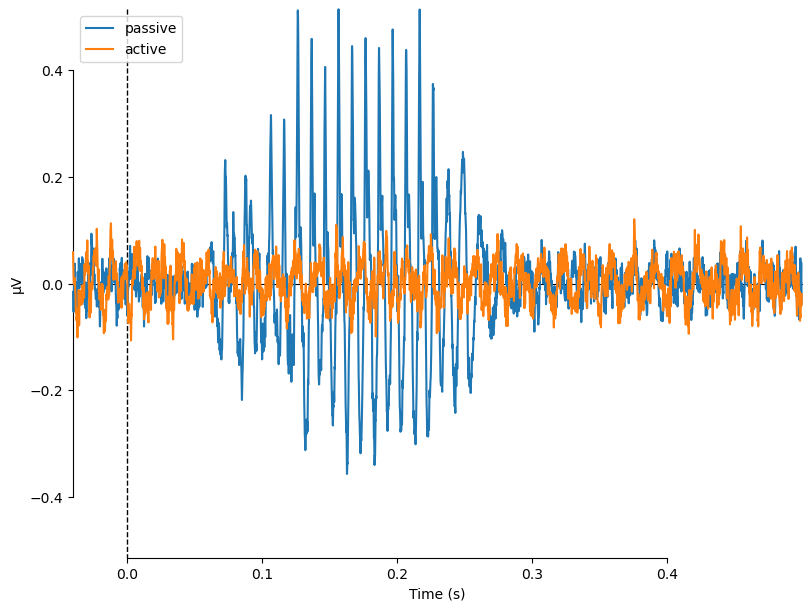

[<Figure size 800x600 with 1 Axes>]

In [41]:
mne.viz.plot_compare_evokeds(evokeds) #, picks='Cz', combine='mean', ci=0.95)

    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
Plotting power spectral density (dB=True).
Plotting power spectral density (dB=True).


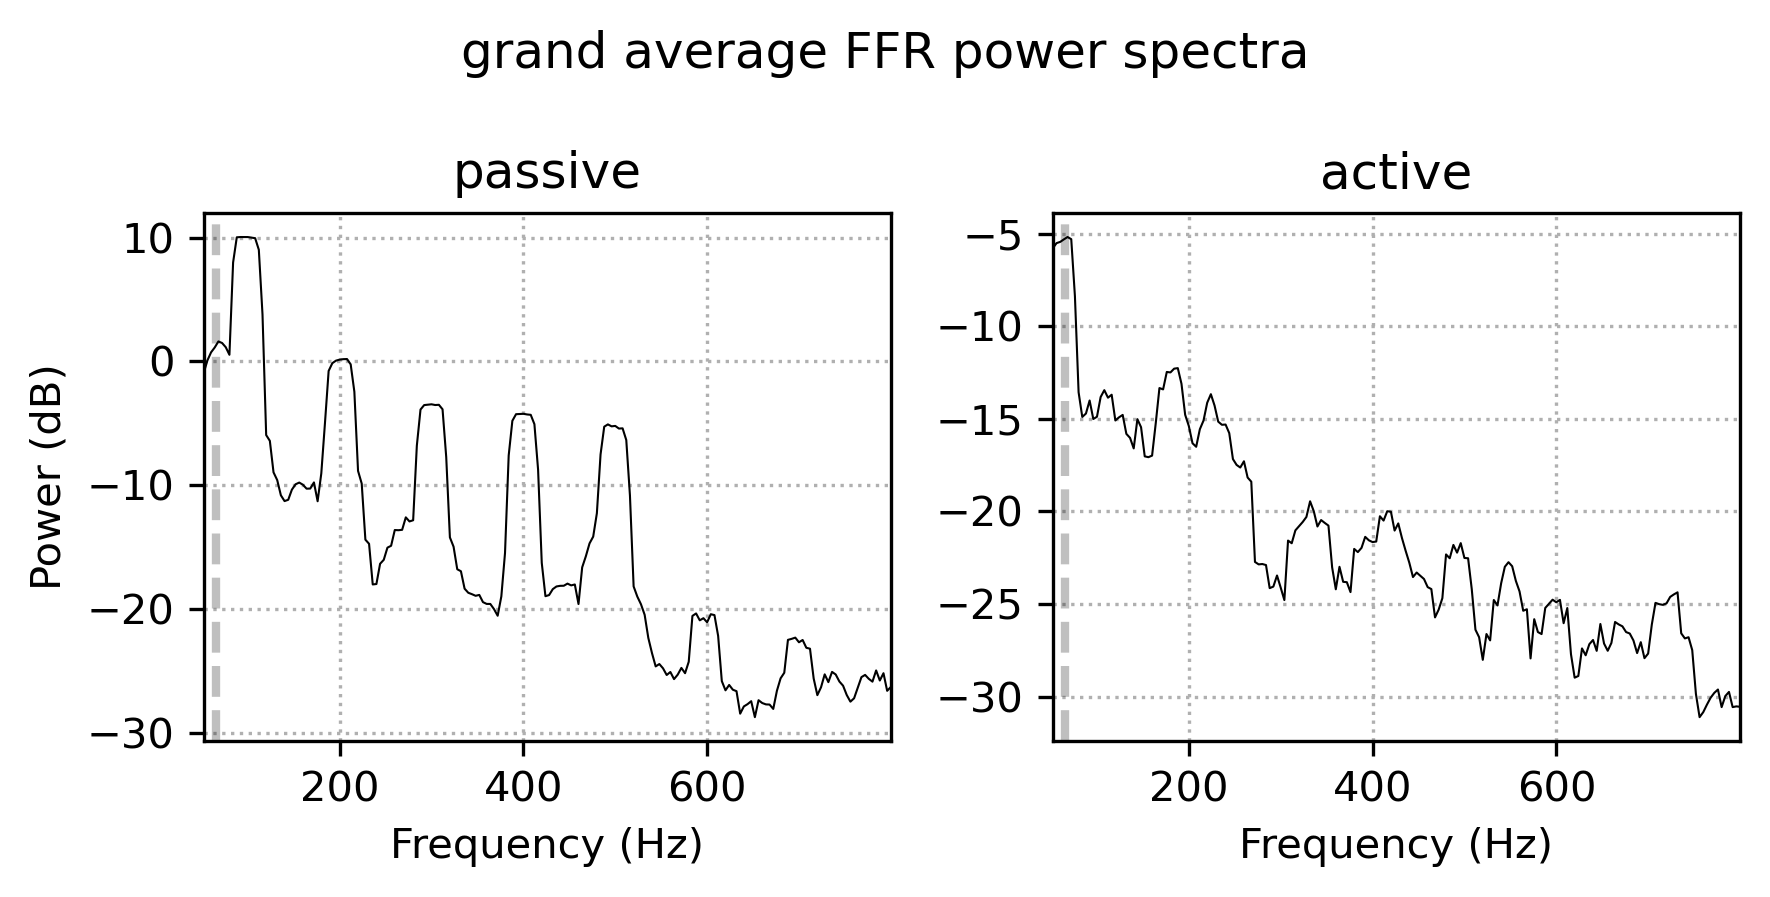

In [50]:
# Power spectra
passive_psd = passive_grandavg.compute_psd(tmin=0.05, tmax=0.300, fmin=50, fmax=800)
active_psd = active_grandavg.compute_psd(tmin=0.05, tmax=0.300, fmin=50, fmax=800)

fig, axes = plt.subplots(1, 2, figsize=(6,3), dpi=300)
ax = axes.flatten()
passive_psd.plot(axes=ax[0], amplitude=False, average=True, show=False)
active_psd.plot(axes=ax[1], amplitude=False, average=True, show=False)
#active_neg_psd.plot(axes=ax[3], amplitude=False, average=True, show=False)

ax[0].set_title('passive')
ax[1].set_title('active')

ax[0].set_ylabel('Power (dB)')
ax[0].set_xlabel('Frequency (Hz)')
ax[1].set_xlabel('Frequency (Hz)')

fig.suptitle(f'grand average FFR power spectra')

fig.tight_layout()
plt.show()
#plt.savefig(f'sub-{sub_label}_polarity-single_spectra.svg')

/var/folders/5g/l5zc58vs5y17h1lbzp_7g3_40000gq/T/ipykernel_88153/1297846617.py:1: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  mne.viz.plot_compare_evokeds(evokeds) #, picks='Cz', combine='mean', ci=0.95)


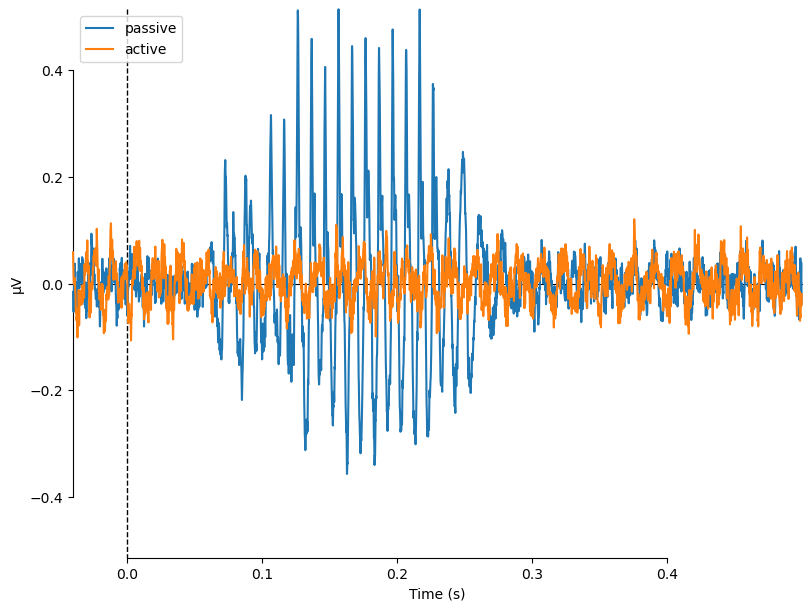

[<Figure size 800x600 with 1 Axes>]

In [ ]:
mne.viz.plot_compare_evokeds(evokeds) #, picks='Cz', combine='mean', ci=0.95)

    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
Plotting power spectral density (dB=True).
Plotting power spectral density (dB=True).


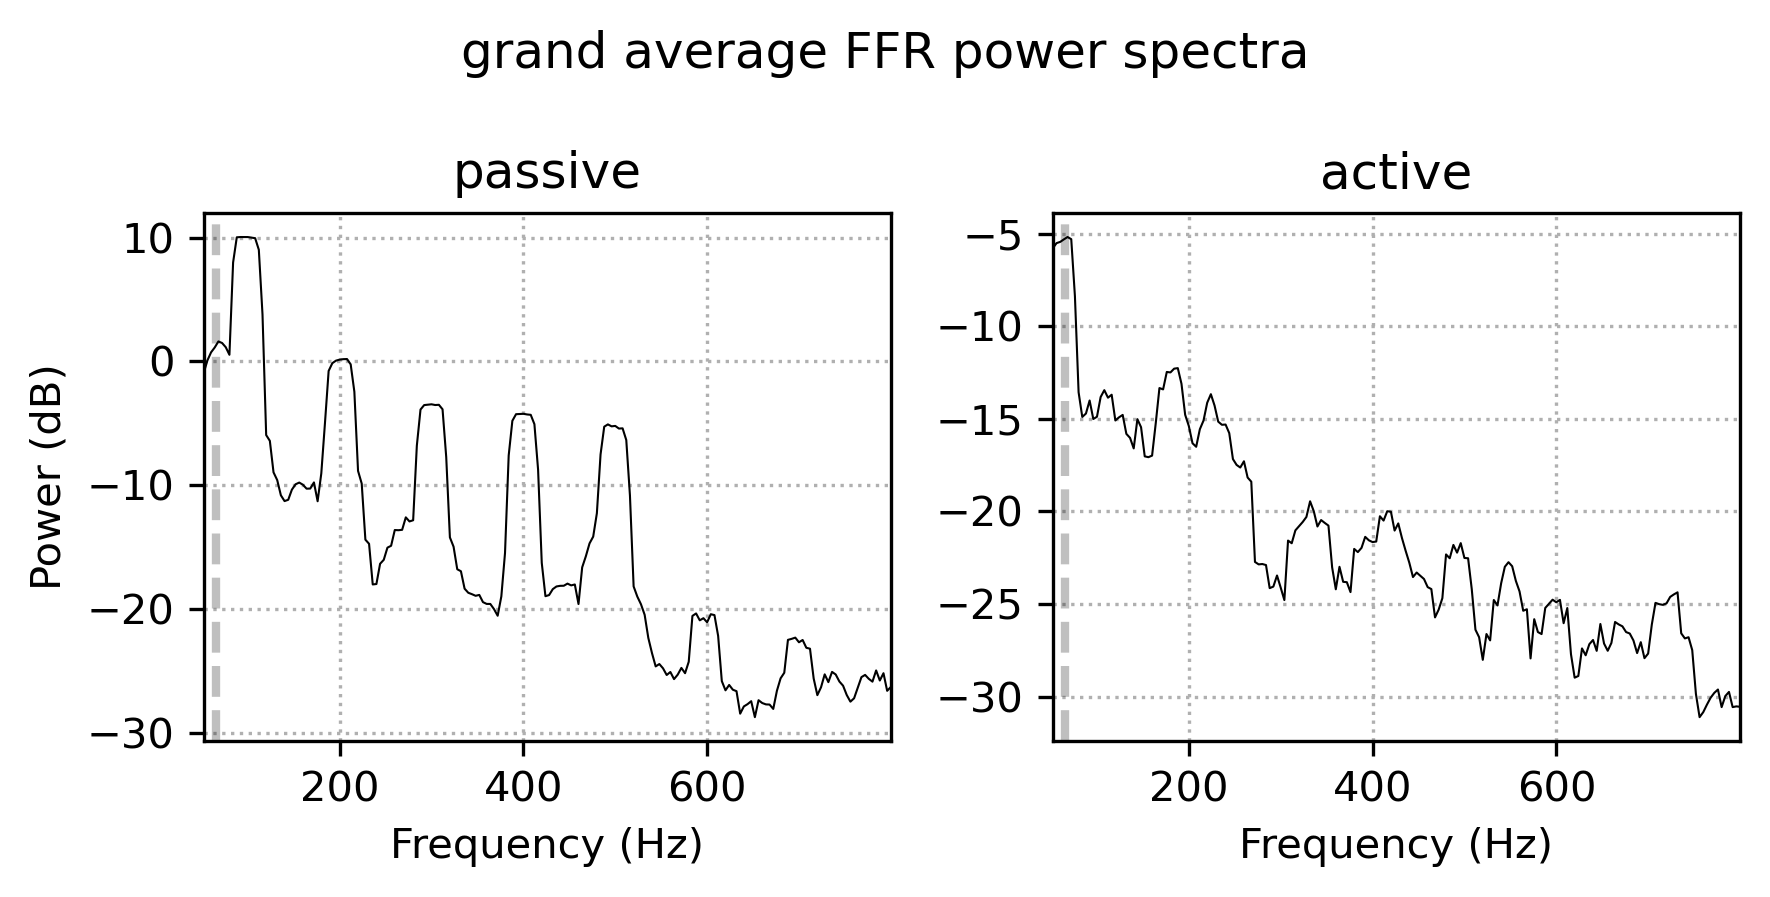

In [ ]:
# Power spectra
passive_psd = passive_grandavg.compute_psd(tmin=0.05, tmax=0.300, fmin=50, fmax=800)
active_psd = active_grandavg.compute_psd(tmin=0.05, tmax=0.300, fmin=50, fmax=800)

fig, axes = plt.subplots(1, 2, figsize=(6,3), dpi=300)
ax = axes.flatten()
passive_psd.plot(axes=ax[0], amplitude=False, average=True, show=False)
active_psd.plot(axes=ax[1], amplitude=False, average=True, show=False)
#active_neg_psd.plot(axes=ax[3], amplitude=False, average=True, show=False)

ax[0].set_title('passive')
ax[1].set_title('active')

ax[0].set_ylabel('Power (dB)')
ax[0].set_xlabel('Frequency (Hz)')
ax[1].set_xlabel('Frequency (Hz)')

fig.suptitle(f'grand average FFR power spectra')

fig.tight_layout()
plt.show()
#plt.savefig(f'sub-{sub_label}_polarity-single_spectra.svg')

/var/folders/5g/l5zc58vs5y17h1lbzp_7g3_40000gq/T/ipykernel_88153/3994567880.py:1: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  mne.viz.plot_compare_evokeds([pas_pos_grandavg,pas_neg_grandavg,act_pos_grandavg])


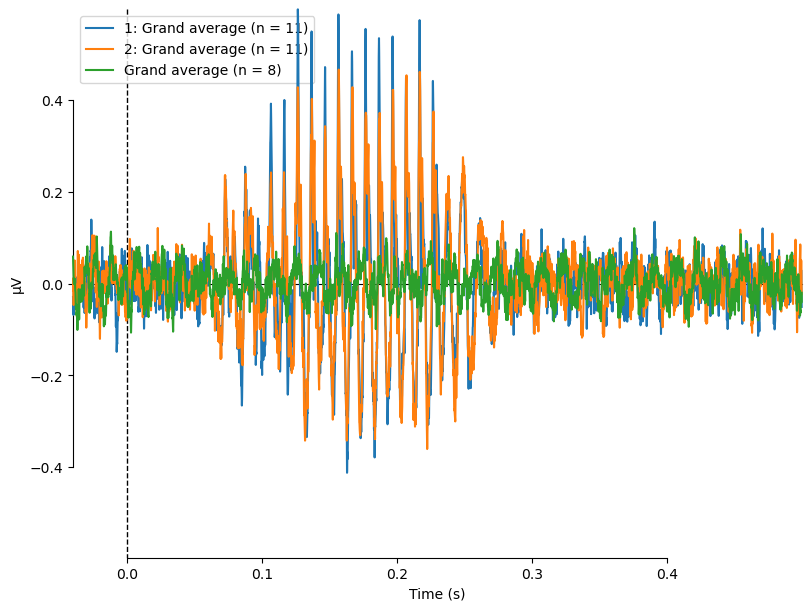

[<Figure size 800x600 with 1 Axes>]

In [38]:
mne.viz.plot_compare_evokeds([pas_pos_grandavg,pas_neg_grandavg,act_pos_grandavg])

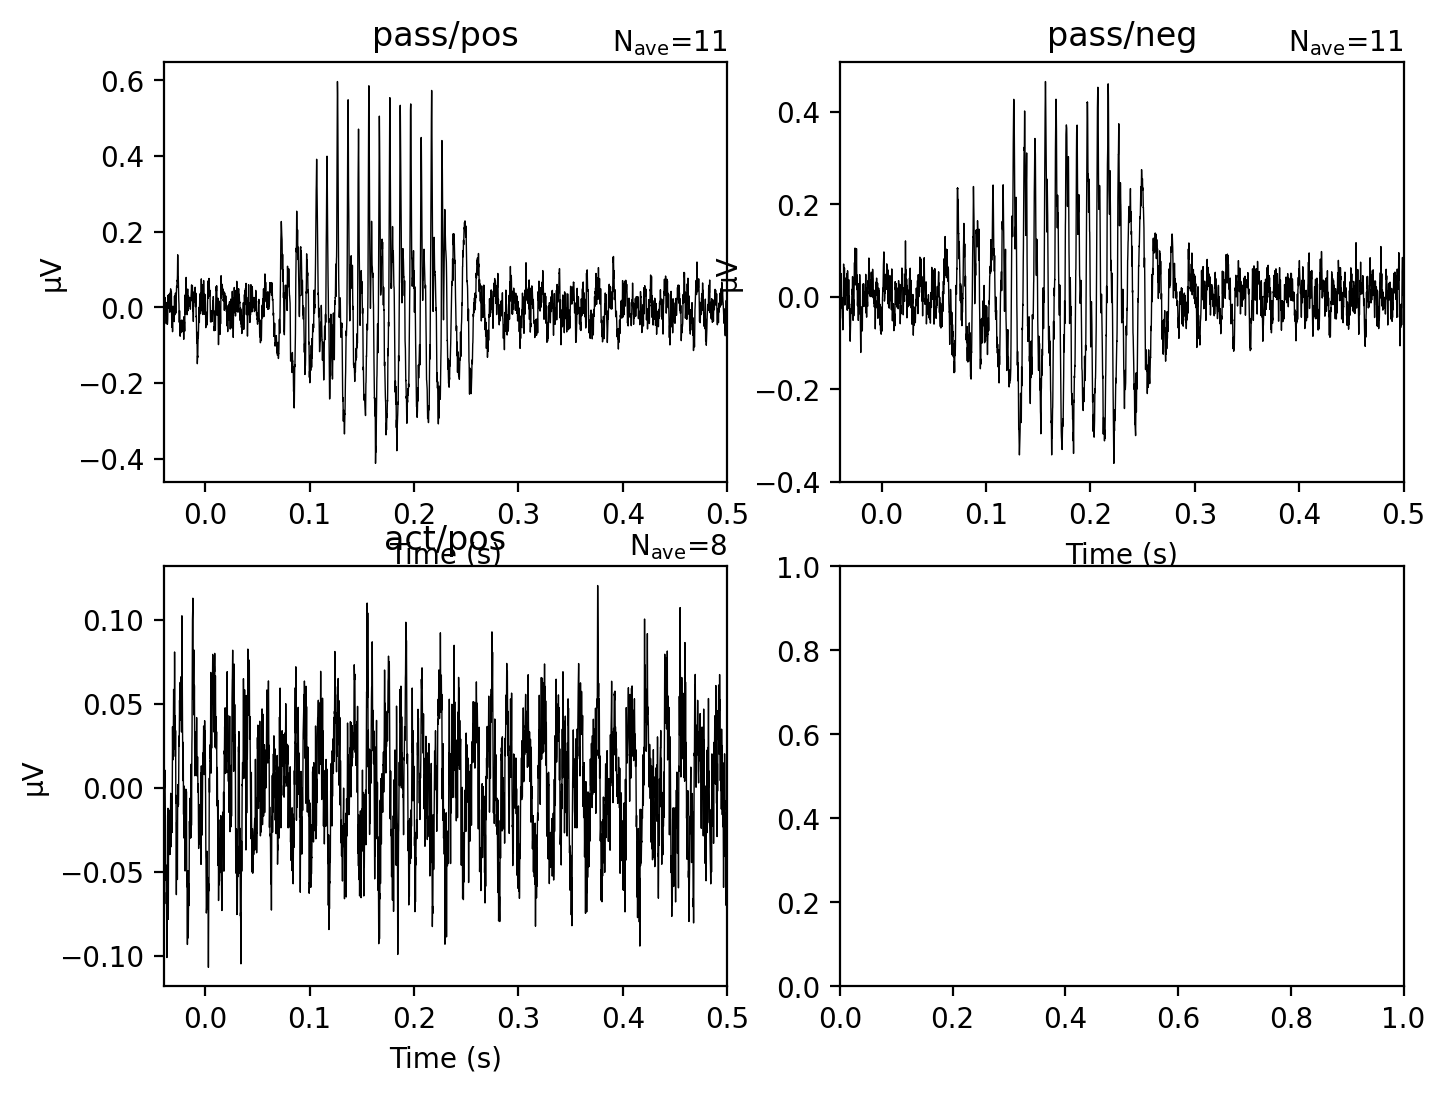

In [37]:
fig, axes = plt.subplots(2, 2, figsize=(8,6), dpi=200)
ax = axes.flatten()
pas_pos_grandavg.plot(axes=ax[0], selectable=False, show=False)
pas_neg_grandavg.plot(axes=ax[1], selectable=False, show=False)
act_pos_grandavg.plot(axes=ax[2], selectable=False, show=False)
#act_neg_grandavg.plot(axes=ax[3], selectable=False, show=False)

ax[0].set_title('pass/pos');
ax[1].set_title('pass/neg');
ax[2].set_title('act/pos');
#ax[3].set_title('act/neg');

    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
Plotting power spectral density (dB=True).
Plotting power spectral density (dB=True).
Plotting power spectral density (dB=True).


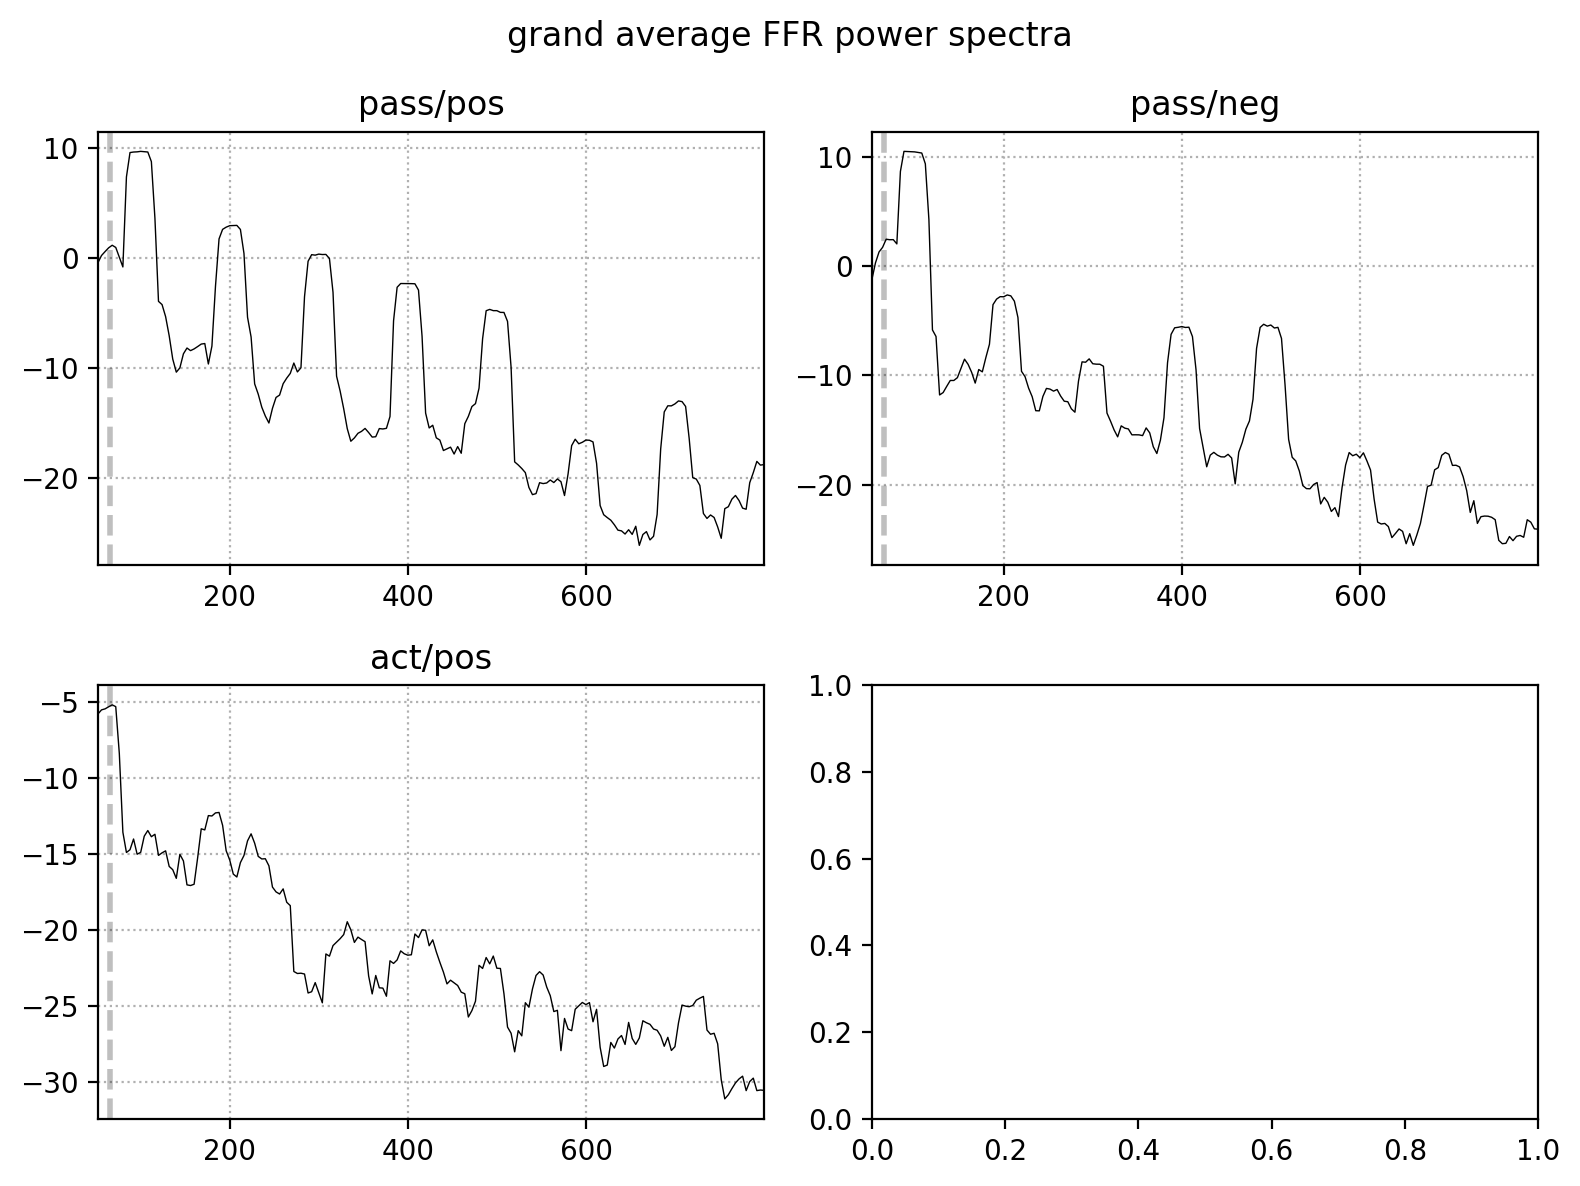

In [43]:
# Power spectra
passive_pos_psd = pas_pos_grandavg.compute_psd(tmin=0.05, tmax=0.300, fmin=50, fmax=800)
passive_neg_psd = pas_neg_grandavg.compute_psd(tmin=0.05, tmax=0.300, fmin=50, fmax=800)
active_pos_psd = act_pos_grandavg.compute_psd(tmin=0.05, tmax=0.300, fmin=50, fmax=800)
#active_neg_psd = act_neg_grandavg.compute_psd(tmin=0.05, tmax=0.300, fmin=50, fmax=800)

fig, axes = plt.subplots(2, 2, figsize=(8,6), dpi=200)
ax = axes.flatten()
passive_pos_psd.plot(axes=ax[0], amplitude=False, average=True, show=False)
passive_neg_psd.plot(axes=ax[1], amplitude=False, average=True, show=False)
active_pos_psd.plot(axes=ax[2], amplitude=False, average=True, show=False)
#active_neg_psd.plot(axes=ax[3], amplitude=False, average=True, show=False)

ax[0].set_title('pass/pos');
ax[1].set_title('pass/neg');
ax[2].set_title('act/pos');
#ax[3].set_title('act/neg');

fig.suptitle(f'grand average FFR power spectra')

fig.tight_layout()
plt.show()
#plt.savefig(f'sub-{sub_label}_polarity-single_spectra.svg')

# Single subject plots

### load epochs

In [12]:
sub_label = '02'
active_epochs = glob(deriv_dir+f'/sub-{sub_label}_task-active_run-all_event-stimtrack_epochs.fif')[0]
passive_epochs = glob(deriv_dir+f'/sub-{sub_label}_task-passive_run-all_event-stimtrack_epochs.fif')[0]

In [13]:
sub_active_epochs = mne.read_epochs(active_epochs)
sub_active_evoked = sub_active_epochs.average()
sub_active_events_evoked = sub_active_epochs.average(by_event_type=True)

sub_passive_epochs = mne.read_epochs(passive_epochs)
sub_passive_evoked = sub_passive_epochs.average()
sub_passive_events_evoked = sub_passive_epochs.average(by_event_type=True)

event_evoked_dict = {}
event_evoked_dict['passive'] = sub_passive_events_evoked
event_evoked_dict['active'] = sub_active_events_evoked

Reading /Users/dsj3886/data_local/EAM1_local/data-bids/derivatives/sub-02_task-active_run-all_event-stimtrack_epochs.fif ...
Isotrak not found
    Found the data of interest:
        t =     -39.98 ...     400.02 ms
        0 CTF compensation matrices available
Not setting metadata
2330 matching events found
No baseline correction applied
0 projection items activated
Reading /Users/dsj3886/data_local/EAM1_local/data-bids/derivatives/sub-02_task-passive_run-all_event-stimtrack_epochs.fif ...
Isotrak not found
    Found the data of interest:
        t =     -39.98 ...     400.02 ms
        0 CTF compensation matrices available
Not setting metadata
2375 matching events found
No baseline correction applied
0 projection items activated


/var/folders/5c/_fg_mvnx2dv1jhkw5xg5fv1h0000gq/T/ipykernel_37981/1638994838.py:1: RuntimeWarning: This filename (/Users/dsj3886/data_local/EAM1_local/data-bids/derivatives/sub-02_task-active_run-all_event-stimtrack_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  sub_active_epochs = mne.read_epochs(active_epochs)
/var/folders/5c/_fg_mvnx2dv1jhkw5xg5fv1h0000gq/T/ipykernel_37981/1638994838.py:5: RuntimeWarning: This filename (/Users/dsj3886/data_local/EAM1_local/data-bids/derivatives/sub-02_task-passive_run-all_event-stimtrack_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  sub_passive_epochs = mne.read_epochs(passive_epochs)


### Plot individual polarities

In [14]:
event_evoked_dict

{'passive': [<Evoked | '1' (average, N=1188), -0.039978 – 0.40002 s, baseline -0.04 – 0 s, 1 ch, ~63 kB>,
  <Evoked | '2' (average, N=1187), -0.039978 – 0.40002 s, baseline -0.04 – 0 s, 1 ch, ~63 kB>],
 'active': [<Evoked | '1' (average, N=1165), -0.039978 – 0.40002 s, baseline -0.04 – 0 s, 1 ch, ~63 kB>,
  <Evoked | '2' (average, N=1165), -0.039978 – 0.40002 s, baseline -0.04 – 0 s, 1 ch, ~63 kB>]}

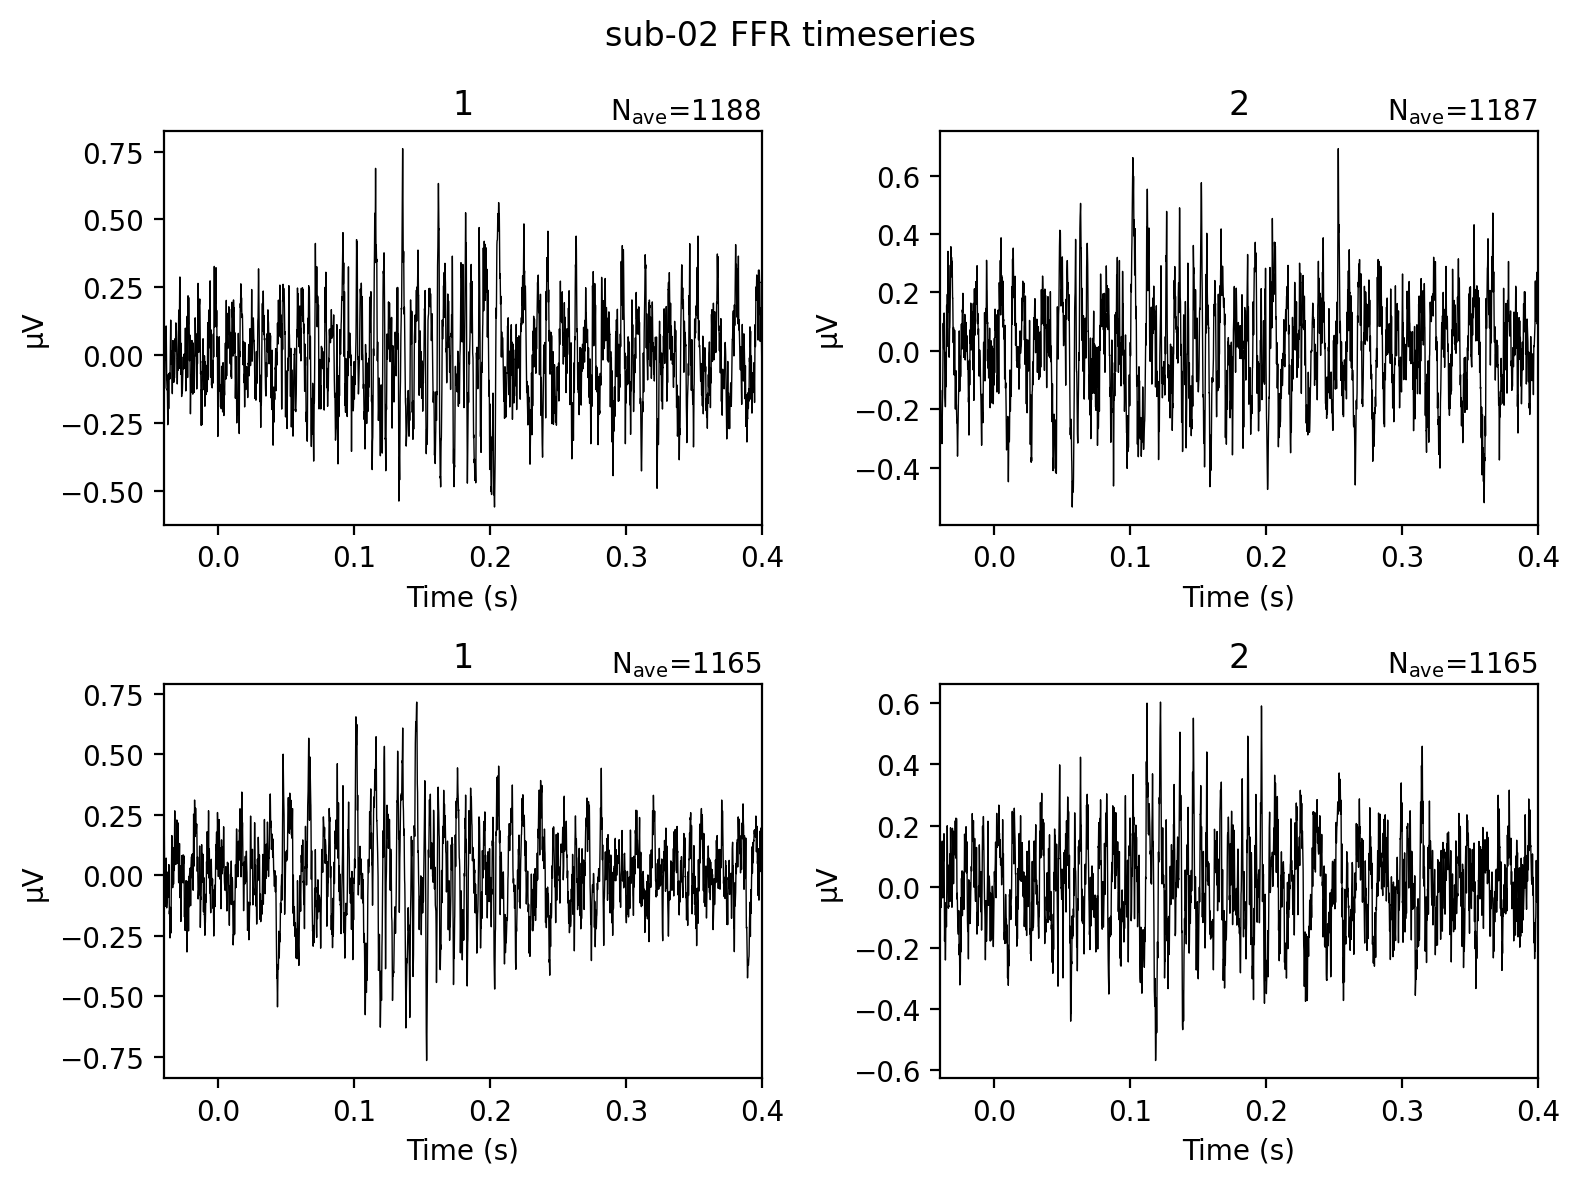

In [15]:
# Waveforms
fig, axes = plt.subplots(2, 2, figsize=(8,6), dpi=200)
ax = axes.flatten()
event_evoked_dict['passive'][0].plot(axes=ax[0], selectable=False, show=False)
event_evoked_dict['passive'][1].plot(axes=ax[1], selectable=False, show=False)
event_evoked_dict['active'][0].plot(axes=ax[2], selectable=False, show=False)
event_evoked_dict['active'][1].plot(axes=ax[3], selectable=False, show=False)

ax[0].set_title(event_evoked_dict['passive'][0].comment);
ax[1].set_title(event_evoked_dict['passive'][1].comment);
ax[2].set_title(event_evoked_dict['active'][0].comment);
ax[3].set_title(event_evoked_dict['active'][1].comment);

fig.suptitle(f'sub-{sub_label} FFR timeseries')

fig.tight_layout()
plt.show()
#plt.savefig(f'sub-{sub_label}_polarity-single_timeseries.svg')

    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows


    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
Plotting power spectral density (dB=True).
Plotting power spectral density (dB=True).
Plotting power spectral density (dB=True).
Plotting power spectral density (dB=True).


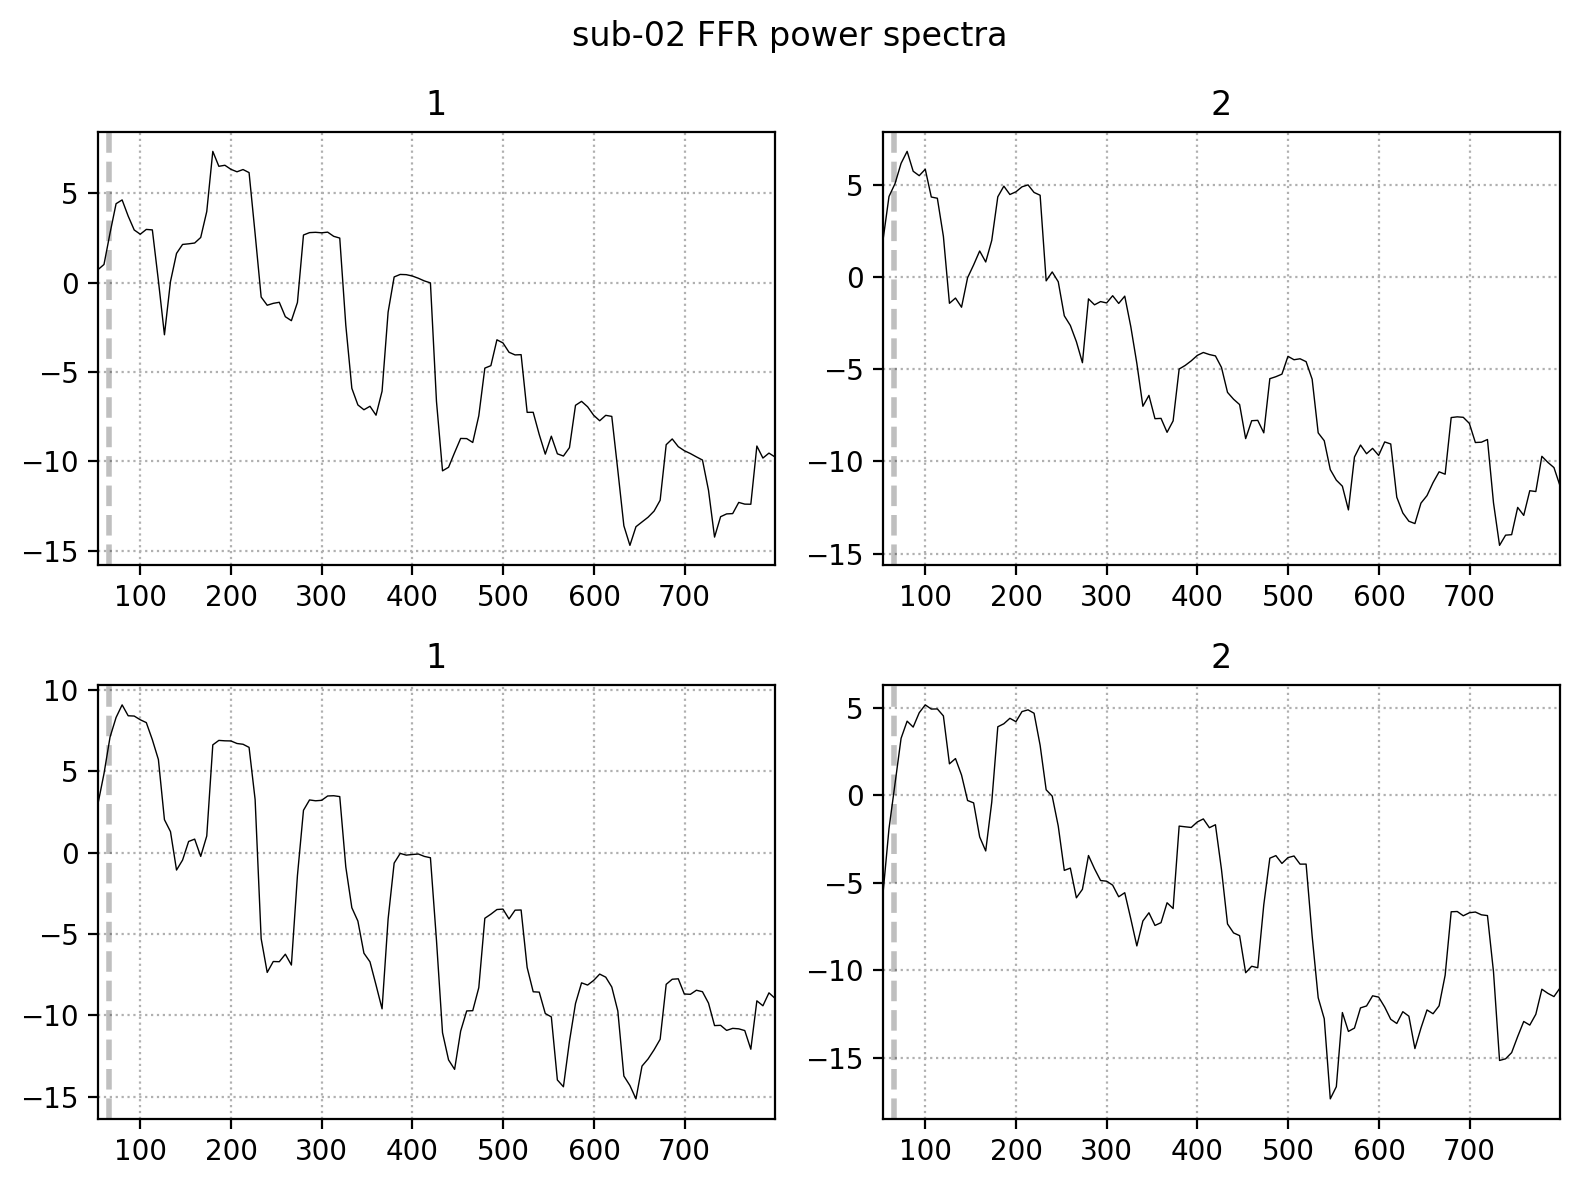

In [16]:
# Power spectra
passive_pos_psd = event_evoked_dict['passive'][0].compute_psd(tmin=0.05, tmax=0.200, fmin=50, fmax=800)
passive_neg_psd = event_evoked_dict['passive'][1].compute_psd(tmin=0.05, tmax=0.200, fmin=50, fmax=800)
active_pos_psd = event_evoked_dict['active'][0].compute_psd(tmin=0.05, tmax=0.200, fmin=50, fmax=800)
active_neg_psd = event_evoked_dict['active'][1].compute_psd(tmin=0.05, tmax=0.200, fmin=50, fmax=800)

fig, axes = plt.subplots(2, 2, figsize=(8,6), dpi=200)
ax = axes.flatten()
passive_pos_psd.plot(axes=ax[0], amplitude=False, average=True, show=False)
passive_neg_psd.plot(axes=ax[1], amplitude=False, average=True, show=False)
active_pos_psd.plot(axes=ax[2], amplitude=False, average=True, show=False)
active_neg_psd.plot(axes=ax[3], amplitude=False, average=True, show=False)

ax[0].set_title(event_evoked_dict['passive'][0].comment);
ax[1].set_title(event_evoked_dict['passive'][1].comment);
ax[2].set_title(event_evoked_dict['active'][0].comment);
ax[3].set_title(event_evoked_dict['active'][1].comment);

fig.suptitle(f'sub-{sub_label} FFR power spectra')

fig.tight_layout()
plt.show()
#plt.savefig(f'sub-{sub_label}_polarity-single_spectra.svg')

No baseline correction applied
No baseline correction applied
No baseline correction applied
No baseline correction applied


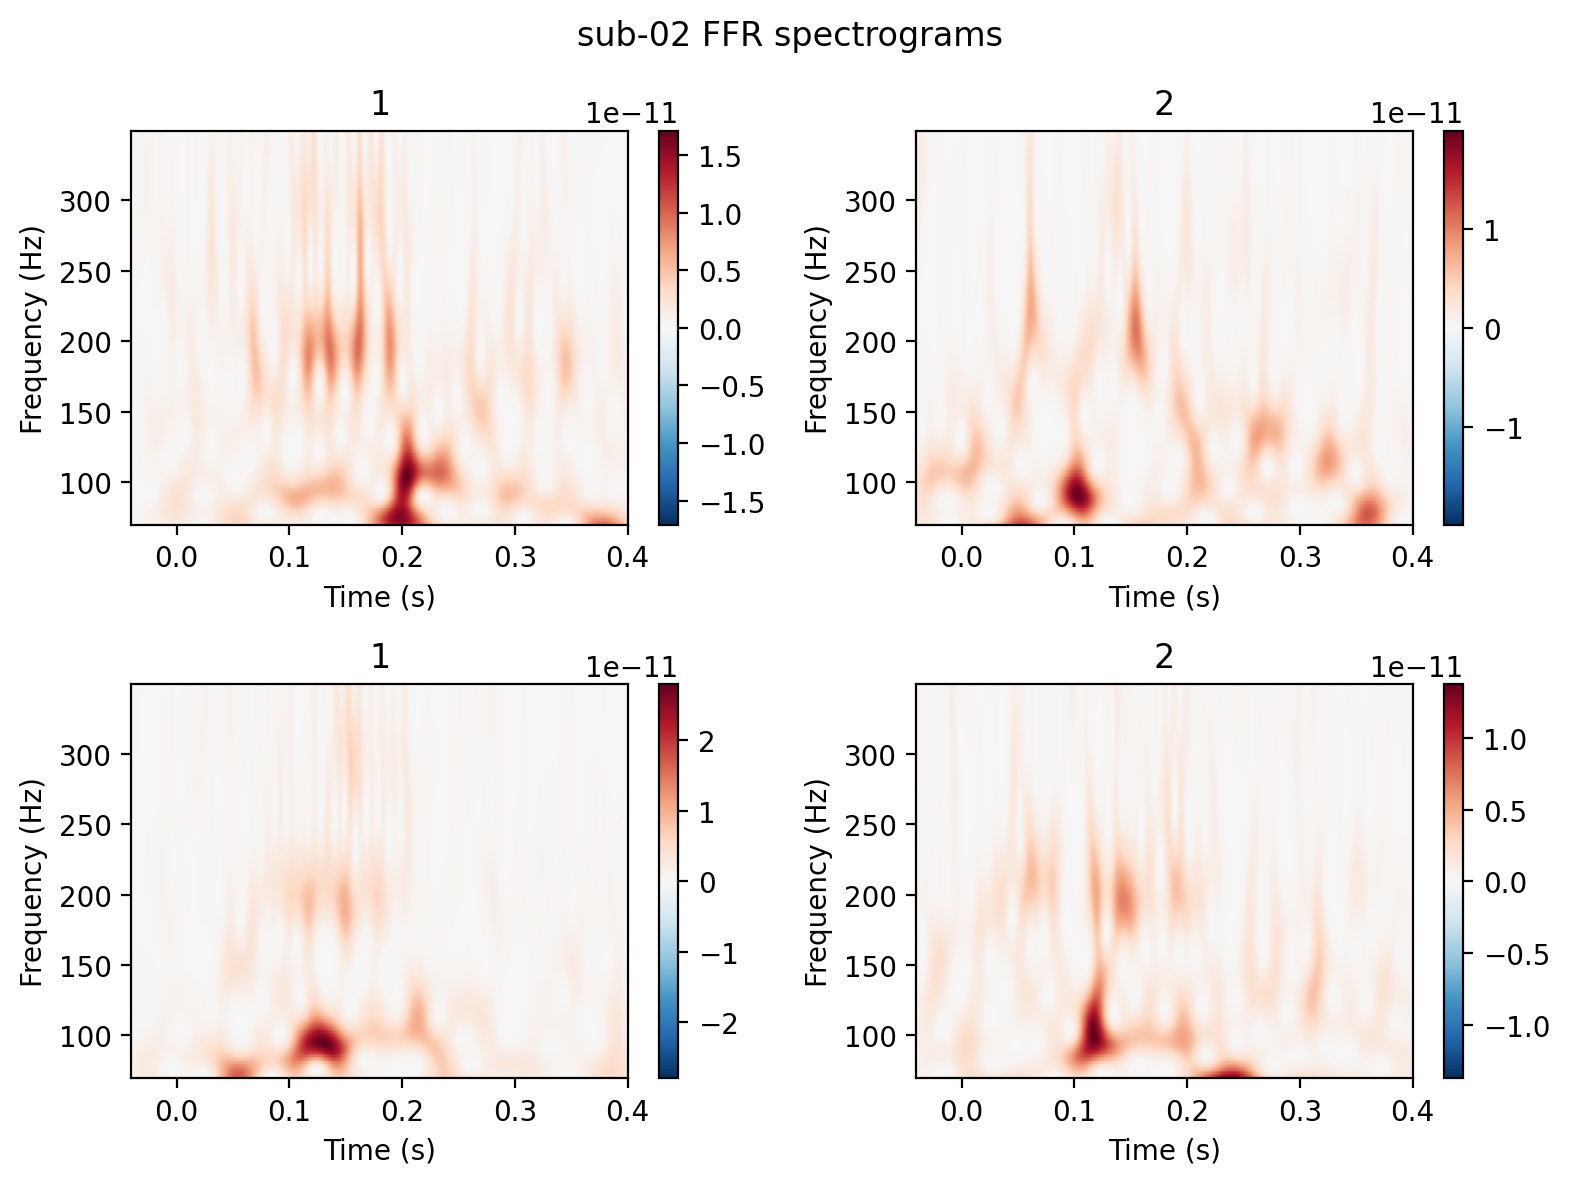

In [17]:
# Spectrograms
frequencies = np.arange(70,350)

passive_pos_power = event_evoked_dict['passive'][0].compute_tfr("morlet", freqs=frequencies)
passive_neg_power = event_evoked_dict['passive'][1].compute_tfr("morlet", freqs=frequencies)
active_pos_power = event_evoked_dict['active'][0].compute_tfr("morlet", freqs=frequencies)
active_neg_power = event_evoked_dict['active'][1].compute_tfr("morlet", freqs=frequencies)

fig, axes = plt.subplots(2, 2, figsize=(8,6), dpi=200)
ax = axes.flatten()
passive_pos_power.plot(axes=ax[0], show=False)
passive_neg_power.plot(axes=ax[1], show=False)
active_pos_power.plot(axes=ax[2], show=False)
active_neg_power.plot(axes=ax[3], show=False)

ax[0].set_title(event_evoked_dict['passive'][0].comment);
ax[1].set_title(event_evoked_dict['passive'][1].comment);
ax[2].set_title(event_evoked_dict['active'][0].comment);
ax[3].set_title(event_evoked_dict['active'][1].comment);

fig.suptitle(f'sub-{sub_label} FFR spectrograms')

fig.tight_layout()
plt.show()
#plt.savefig(f'sub-{sub_label}_polarity-single_spectrograms.svg')

### Plot combined polarities

In [18]:
task_evoked_dict

{}

KeyError: 'passive'

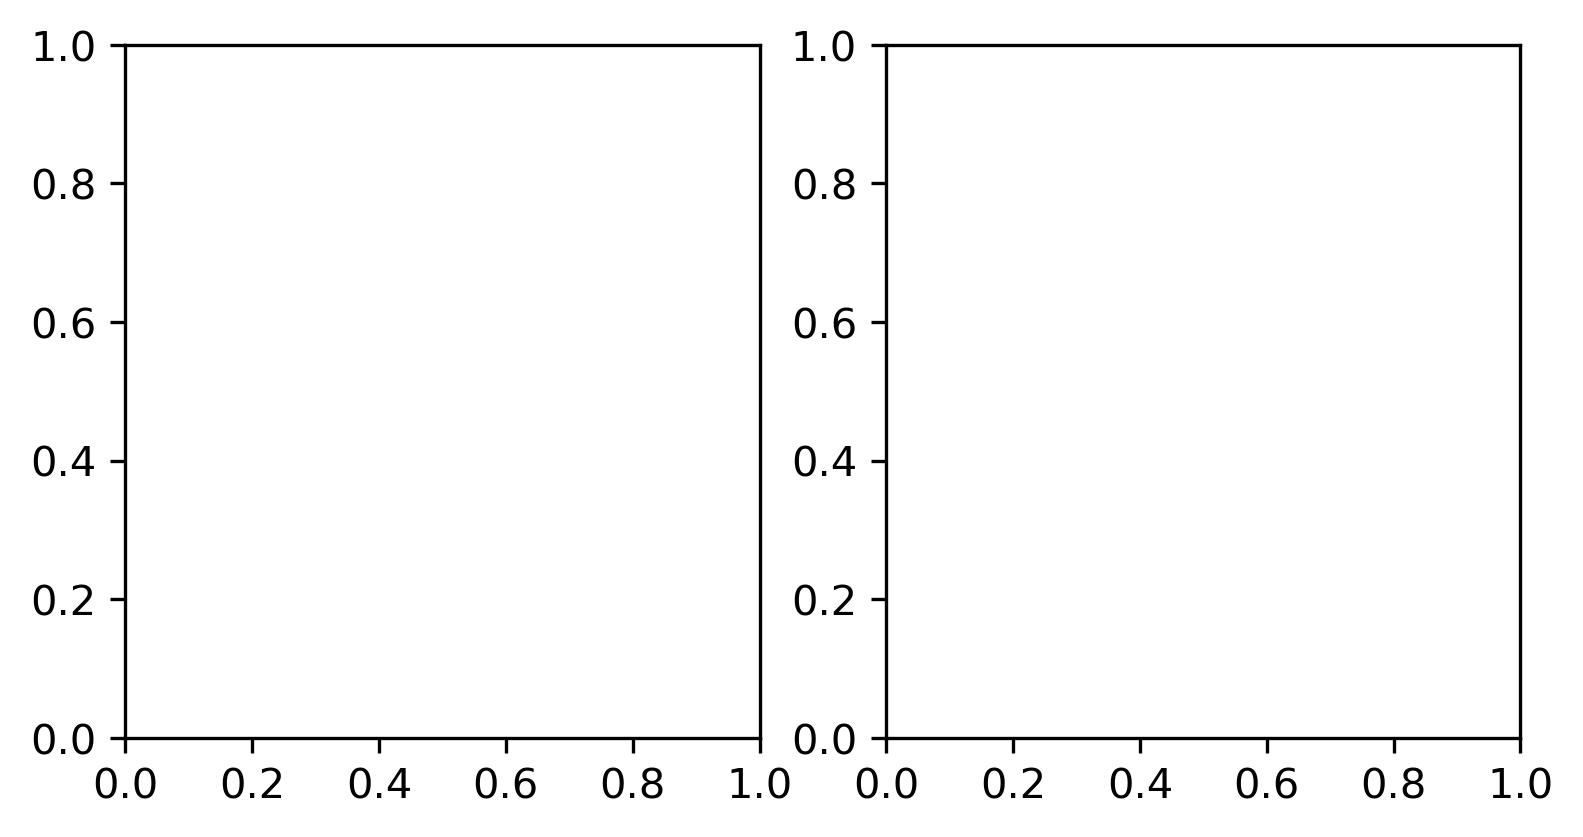

In [ ]:
# Waveforms
fig, ax = plt.subplots(1, 2, figsize=(6,3), dpi=300)
task_evoked_dict['passive'].plot(axes=ax[0], selectable=False, show=False)
task_evoked_dict['active'].plot(axes=ax[1], selectable=False, show=False)

ax[0].set_title('passive');
ax[1].set_title('active');

fig.suptitle(f'sub-{sub_label} FFR timeseries')

fig.tight_layout()
plt.show()
plt.savefig(f'sub-{sub_label}_timeseries.svg')

In [20]:
# Power spectra
passive_psd = task_evoked_dict['passive'].compute_psd(tmin=0.05, tmax=0.300, fmin=50, fmax=800)
active_psd = task_evoked_dict['active'].compute_psd(tmin=0.05, tmax=0.300, fmin=50, fmax=800)
fig, ax = plt.subplots(1, 2, figsize=(6,3), dpi=300)
passive_psd.plot(axes=ax[0], amplitude=False, average=True, show=False)
active_psd.plot(axes=ax[1], amplitude=False, average=True, show=False)

ax[0].set_title('passive');
ax[1].set_title('active');

fig.suptitle(f'sub-{sub_label} FFR power spectra')

fig.tight_layout()
plt.show()
plt.savefig(f'sub-{sub_label}_spectra.svg')

KeyError: 'passive'

In [21]:
# Spectrograms
frequencies = np.arange(70,350)
active_power =  task_evoked_dict['active'].compute_tfr("morlet", freqs=frequencies)
passive_power =  task_evoked_dict['passive'].compute_tfr("morlet", freqs=frequencies)
fig, ax = plt.subplots(1, 2, figsize=(6,3), dpi=300)
passive_power.plot(axes=ax[0], show=False)
active_power.plot(axes=ax[1], show=False)

ax[0].set_title('passive');
ax[1].set_title('active');

fig.suptitle(f'sub-{sub_label} FFR spectrograms')

fig.tight_layout()
plt.show()
plt.savefig(f'sub-{sub_label}_spectrograms.svg')

KeyError: 'active'

# QA and metrics

## RMS SNR

In [76]:
from numpy import mean, sqrt, square, arange

In [78]:
for sx, stim in enumerate(task_evoked_dict):
    s_evoked = task_evoked_dict[stim]
    baseline_ind_bounds = s_evoked.time_as_index(task_evoked_dict[stim].baseline)
    response_ind_bounds = s_evoked.time_as_index([0.05, 0.200])

    evoked_baseline = s_evoked.data[0,baseline_ind_bounds[0]:baseline_ind_bounds[1]]
    evoked_response = s_evoked.data[0,response_ind_bounds[0]:response_ind_bounds[1]]
    rms_baseline = sqrt(mean(square(evoked_baseline)))
    rms_response = sqrt(mean(square(evoked_response)))

    rms_snr = rms_response / rms_baseline

    print(f'{stim} RMS SNR: {rms_snr:.04f}')
print(f'\nMean RMS SNR: {rms_snr.mean():.04f}' )

active RMS SNR: 0.9412
passive RMS SNR: 1.5903
motor RMS SNR: 0.8907

Mean RMS SNR: 0.8907


## [IN PREP] Autocorrelation

In [42]:
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [43]:
acf, confint = sm.tsa.stattools.acf(all_evoked.data[0,:], 
                                    nlags=len(all_evoked.data[0,:])-1,
                                    alpha=.05)

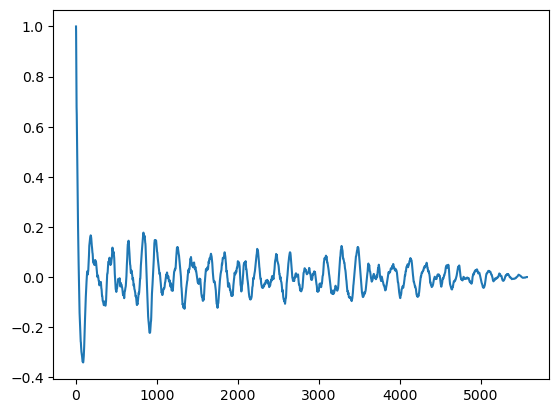

In [44]:
plt.plot(acf)
plt.show()

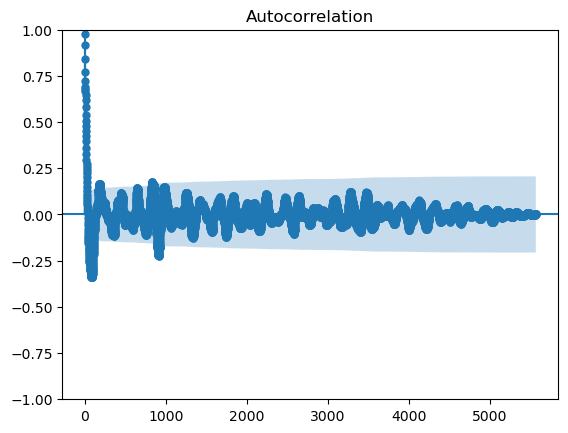

In [45]:
sm.graphics.tsa.plot_acf(all_evoked.data[0,:], 
                         lags=len(all_evoked.data[0,:])-1, 
                         zero=False,)

## [IN PREP] Stimulus–response correlations


In [46]:
data.pick(['Erg1'])

Measurement date,"July 18, 2024 13:12:19 GMT"
Experimenter,Unknown
Participant,
Digitized points,Not available
Good channels,1 EEG
Bad channels,None
EOG channels,Not available
ECG channels,Not available
Sampling frequency,16384.00 Hz
Highpass,0.00 Hz
Lowpass,3334.00 Hz


In [47]:
# epoch data based on stimulus events
stim_epochs = mne.Epochs(data_filtered, 
                    events, 
                    event_id=event_dict,
                    picks=['Erg1'],
                    tmin=-0.04, tmax=0.3, 
                    baseline=[-0.04, 0],
                    #reject = dict(eeg = 35e-6)).drop_bad()
                    reject=dict(eeg=75)).drop_bad()

Not setting metadata
1170 matching events found
Setting baseline interval to [-0.04, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 1170 events and 5571 original time points ...
0 bad epochs dropped


In [48]:
stim_epochs

Number of events,1170
Events,button_press: 1170
Time range,-0.040 – 0.300 s
Baseline,-0.040 – 0.000 s


In [49]:
stim_epochs.average()

Condition,button_press
Data kind,average
Timepoints,5571 samples
Channels,1 channels
Number of averaged epochs,1170
Time range (secs),-0.03997802734375 – 0.29998779296875
Baseline (secs),-0.040 – 0.000 s


Need more than one channel to make topography for eeg. Disabling interactivity.


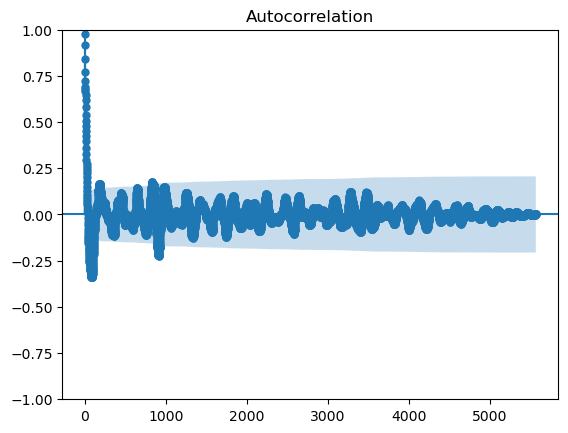

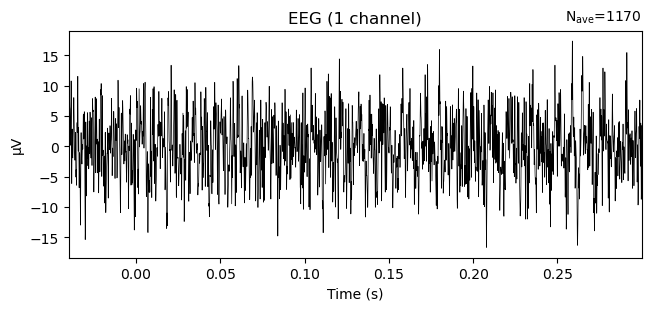

In [50]:
stim_epochs.average().plot();

In [51]:
stim_data = stim_epochs.average().get_data()[0,:]
active_data = task_evoked_dict['active'].get_data()[0,:]
passive_data = task_evoked_dict['passive'].get_data()[0,:]

In [78]:
np.array(range(len(stim_data)))

array([   0,    1,    2, ..., 5568, 5569, 5570])

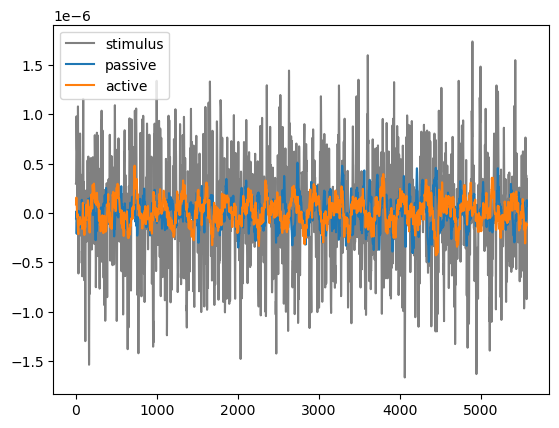

In [86]:
plt.plot(stim_data/10, color='grey')
plt.plot(passive_data)
plt.plot(active_data)
plt.legend(['stimulus','passive','active'])
#plt.xaxis(np.array(range(len(stim_data)))/16384)
plt.show()

In [52]:
from scipy.stats import spearmanr
active_res = spearmanr(active_data, stim_data, alternative='greater')
passive_res = spearmanr(passive_data, stim_data, alternative='greater')


In [53]:
active_res

SignificanceResult(statistic=0.013488523482214512, pvalue=0.15706554806619186)

In [54]:
passive_res

SignificanceResult(statistic=-0.0022353155565718644, pvalue=0.5662381718955769)